# Importing libraries and data reading

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration and Cleaning

In [118]:
data = pd.read_csv("dataset/data_science_competition_2024.csv")

### Data Exploration

In [119]:
data.shape

(100000, 21)

In [120]:
data.head(10)

,Unnamed: 0,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,...,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,...,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,...,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default
2,2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,...,1,44797.554126,0.22,43,1,57,3330.826656,married,43,Did not default
3,3,191c62f8-2211-49fe-ba91-43556b307871,female,2022 06 22,USD,Zimbabwe,female,True,Doctor,Rusape,...,0,35681.496413,0.23,47,0,42,2246.797020,divorced,47,Did not default
4,4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,2023 02 08,USD,Zimbabwe,male,True,Nurse,Chipinge,...,0,34156.055882,0.20,42,0,45,2310.858441,married,42,Did not default
5,5,3595fbe4-397c-42b1-aeb2-f85a6cdf4ee3,other,2020 11 15,USD,Zimbabwe,other,True,Data Analyst,Chimanimani,...,0,37778.075179,0.21,46,0,44,2633.653709,single,46,Did not default
6,6,a6255398-b8c6-494c-b7ff-3d7fee6703d5,male,2023 11 09,USD,Zimbabwe,male,True,Teacher,Harare,...,0,28675.968452,0.22,47,0,52,2554.371003,single,47,Did not default
7,7,b259ce87-a771-46ee-9785-b0a9f5dab2d6,female,2021 03 18,USD,Zimbabwe,female,True,Data Analyst,Marondera,...,1,38406.933711,0.22,39,1,46,2847.991485,married,39,Did not default
8,8,5f7444d0-76c9-4902-8a97-a1d134101100,other,2020 04 04,USD,Zimbabwe,other,True,Nurse,Kadoma,...,0,28015.543801,0.22,46,0,47,2521.387875,married,46,Did not default
9,9,12fb64f7-8101-4868-a2fe-83178bbaebce,male,2020 12 03,USD,Zimbabwe,male,True,Nurse,Marondera,...,1,61800.467639,0.24,37,1,43,2799.437570,divorced,37,Did not default


##### Removing unnamed: 0, loan_id, gender
* unnamed is a duplicate of the index column and should be dropped
* loan_id is a unique identify so the model may overfit to the specific load ID's
* gender and sex have the same value so iam going to drop gender column

In [121]:
data.drop(columns=["Unnamed: 0", "gender", "loan_id"], inplace=True)
data.head()

,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,27000.0,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default
2,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,1,57,3330.826656,married,43,Did not default
3,2022 06 22,USD,Zimbabwe,female,True,Doctor,Rusape,24000.0,0,35681.496413,0.23,47,0,42,2246.797020,divorced,47,Did not default
4,2023 02 08,USD,Zimbabwe,male,True,Nurse,Chipinge,19000.0,0,34156.055882,0.20,42,0,45,2310.858441,married,42,Did not default


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   disbursemet_date      100000 non-null  object 
 1   currency              100000 non-null  object 
 2   country               99900 non-null   object 
 3   sex                   100000 non-null  object 
 4   is_employed           100000 non-null  bool   
 5   job                   95864 non-null   object 
 6   location              99405 non-null   object 
 7   loan_amount           100000 non-null  float64
 8   number_of_defaults    100000 non-null  int64  
 9   outstanding_balance   100000 non-null  float64
 10  interest_rate         100000 non-null  float64
 11  age                   100000 non-null  int64  
 12  number_of_defaults.1  100000 non-null  int64  
 13  remaining term        100000 non-null  object 
 14  salary                100000 non-null  float64
 15  m

In [123]:
data.describe()

,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,salary,age.1
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000
mean,31120.000000,0.441970,36964.909763,0.210435,43.57069,0.441970,2781.804324,43.57069
std,15895.093631,0.688286,10014.758477,0.018725,4.86376,0.688286,696.450055,4.86376
min,1000.000000,0.000000,0.000000,0.100000,21.00000,0.000000,250.000000,21.00000
25%,21000.000000,0.000000,29625.227472,0.200000,40.00000,0.000000,2273.929349,40.00000
50%,31000.000000,0.000000,35063.852394,0.210000,44.00000,0.000000,2665.441567,44.00000
75%,40000.000000,1.000000,42133.388817,0.220000,47.00000,1.000000,3146.577655,47.00000
max,273000.000000,2.000000,150960.000000,0.300000,65.00000,2.000000,10000.000000,65.00000


## Data preparation

In [124]:
data.columns

Index(['disbursemet_date', 'currency', 'country', 'sex', 'is_employed', 'job',
       'location', 'loan_amount', 'number_of_defaults', 'outstanding_balance',
       'interest_rate', 'age', 'number_of_defaults.1', 'remaining term',
       'salary', 'marital_status', 'age.1', 'Loan Status'],
      dtype='object')

In [125]:
# Renaming columns
data.rename(columns={'disbursemet_date': 'disbursement_date','number_of_defaults.1':'number_of_defaults', 'remaining term':'remaining_term',
                     'age.1':'age', 'Loan Status':'loan_status'}, inplace=True)
data.columns

Index(['disbursement_date', 'currency', 'country', 'sex', 'is_employed', 'job',
       'location', 'loan_amount', 'number_of_defaults', 'outstanding_balance',
       'interest_rate', 'age', 'number_of_defaults', 'remaining_term',
       'salary', 'marital_status', 'age', 'loan_status'],
      dtype='object')

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   disbursement_date    100000 non-null  object 
 1   currency             100000 non-null  object 
 2   country              99900 non-null   object 
 3   sex                  100000 non-null  object 
 4   is_employed          100000 non-null  bool   
 5   job                  95864 non-null   object 
 6   location             99405 non-null   object 
 7   loan_amount          100000 non-null  float64
 8   number_of_defaults   100000 non-null  int64  
 9   outstanding_balance  100000 non-null  float64
 10  interest_rate        100000 non-null  float64
 11  age                  100000 non-null  int64  
 12  number_of_defaults   100000 non-null  int64  
 13  remaining_term       100000 non-null  object 
 14  salary               100000 non-null  float64
 15  marital_status    

In [127]:
data['remaining_term'] = data['remaining_term'].str.strip('_-')

In [128]:
#Convert data  'disbursement_date', 
data["disbursement_date"] = pd.to_datetime(data["disbursement_date"])
data["remaining_term"] = pd.to_numeric(data["remaining_term"])

In [129]:
data.isna().sum()

disbursement_date         0
currency                  0
country                 100
sex                       0
is_employed               0
job                    4136
location                595
loan_amount               0
number_of_defaults        0
outstanding_balance       0
interest_rate             0
age                       0
number_of_defaults        0
remaining_term            0
salary                    0
marital_status            0
age                       0
loan_status               0
dtype: int64

In [130]:
#Feeling na values with most common value on the feature
data["country"] = data["country"].fillna(data["country"].mode()[0])
data["job"] = data["job"].fillna(data["job"].mode()[0])
data["location"] = data["location"].fillna(data["location"].mode()[0])

In [131]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

### Dealing with string features

In [132]:
import math

def plot_features(_features, _data):
    num_cols = 2  # Number of columns for subplots
    num_features = len(_features)
    num_rows = math.ceil(num_features / num_cols)  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # Adjust figsize as needed

    for i, feature in enumerate(_features):
        row = i // num_cols
        col = i % num_cols

        _data[feature].value_counts().plot(kind='bar', ax=axes[row, col])
        axes[row, col].set_title(f'Bar plot for {feature}')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Count')

    # Adjust layout
    plt.tight_layout()
    plt.show()

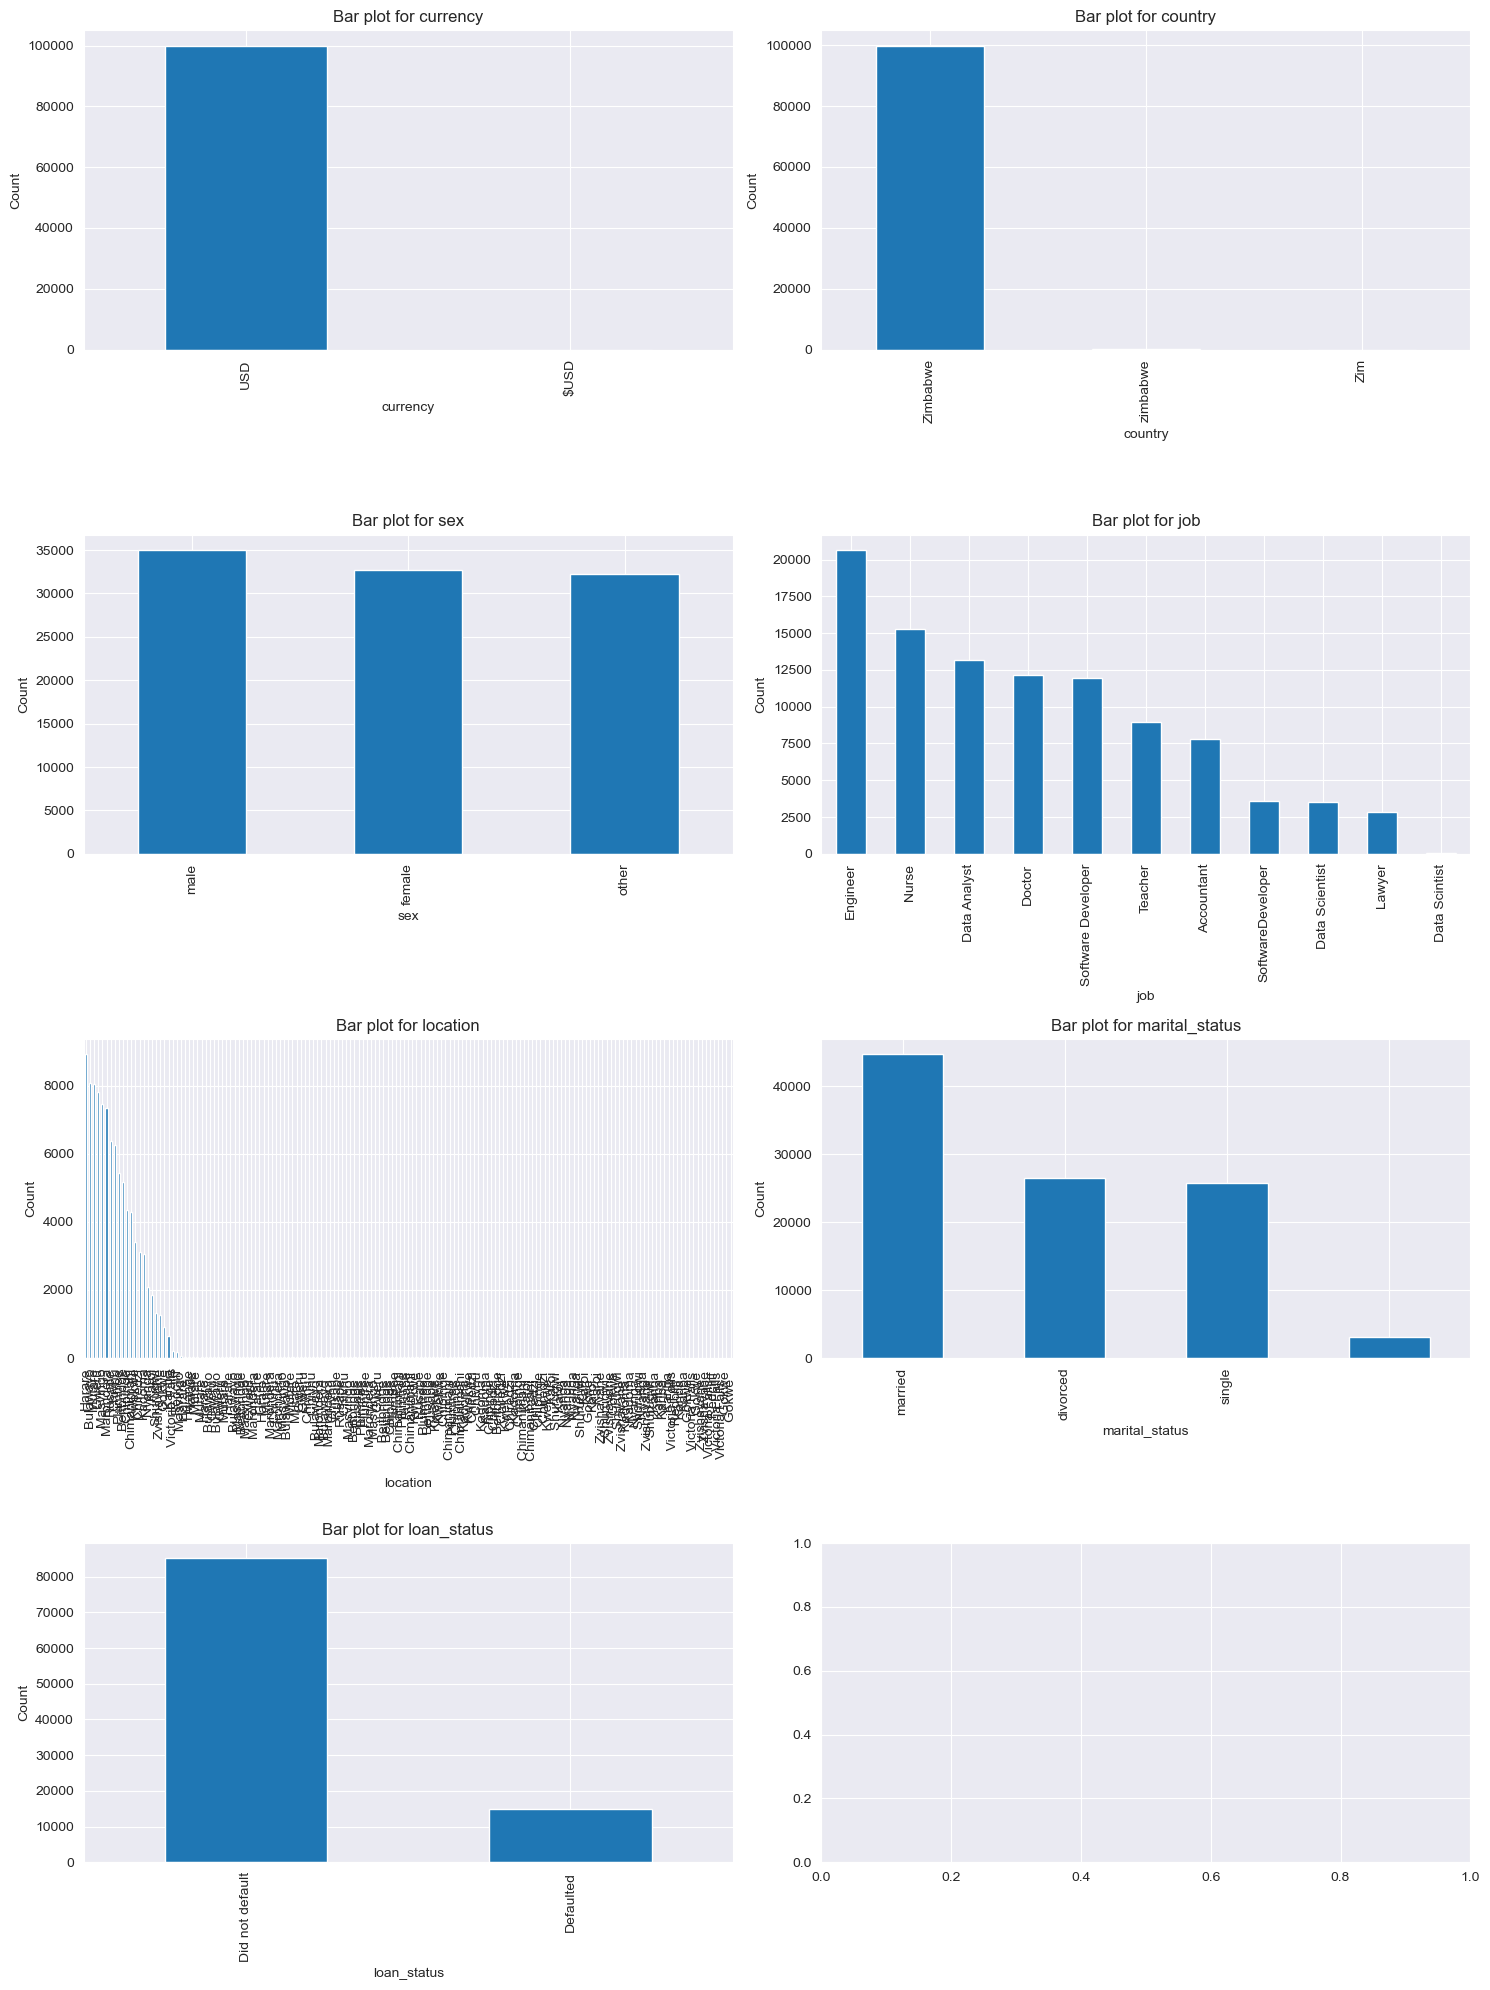

In [133]:
# Define the list of features
features = data.select_dtypes(include=[object]).columns.to_list()
plot_features(features, data)

* From the above we can see that `location`, `job`, `marital_status`, `country` and `currency` features needs to be cleaned and standardized

In [134]:
values,counts = np.unique(data.location, return_counts=True)
for value, count in zip(values,counts):
    print(f"{value}, {count}")

   Beitbridge , 32
   Beitbridge   , 22
   Bulawayo , 33
   Bulawayo   , 30
   Chimanimani , 20
   Chimanimani   , 11
   Chipinge , 12
   Chipinge   , 20
   Chiredzi , 15
   Chiredzi   , 14
   Chivhu , 25
   Chivhu   , 27
   Gokwe , 1
   Gokwe   , 7
   Gweru , 30
   Gweru   , 34
   Harare , 33
   Harare   , 44
   Kadoma , 12
   Kadoma   , 6
   Kariba , 2
   Kariba   , 3
   Karoi , 6
   Karoi   , 11
   Kwekwe , 18
   Kwekwe   , 10
   Marondera , 30
   Marondera   , 27
   Masvingo , 32
   Masvingo   , 32
   Mutare , 39
   Mutare   , 33
   Nyanga , 8
   Nyanga   , 5
   Plumtree , 19
   Plumtree   , 16
   Redcliff   , 3
   Rusape , 18
   Rusape   , 24
   Shurugwi , 6
   Shurugwi   , 4
   Victoria Falls , 3
   Zvishavane , 1
   Zvishavane   , 4
 Beitbridge , 17
 Beitbridge   , 21
 Bulawayo , 34
 Bulawayo   , 28
 Chimanimani , 18
 Chimanimani   , 16
 Chipinge , 16
 Chipinge   , 16
 Chiredzi , 14
 Chiredzi   , 11
 Chivhu , 28
 Chivhu   , 29
 Gokwe , 6
 Gokwe   , 2
 Gweru , 22
 Gweru   , 33
 H

* The above shows that most location tho same are being seen as there unique values because of white space that's in front of the location text
* So i am going to remove the white space from the feature location

<Axes: ylabel='location'>

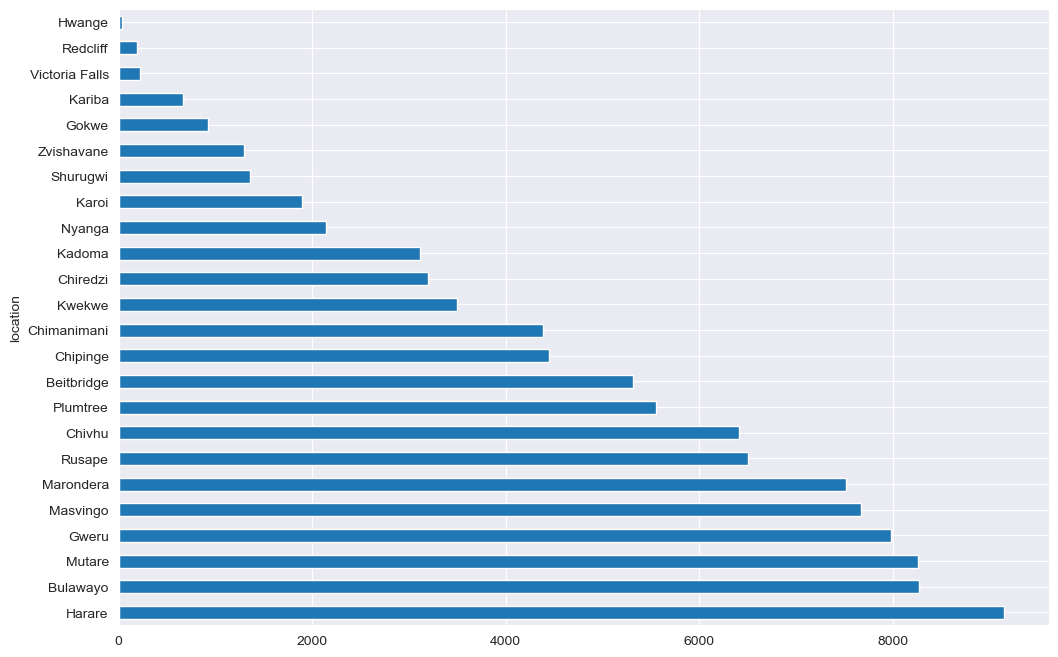

In [135]:
data["location"] = data["location"].str.strip()
# Plotting
data["location"].value_counts().plot(kind='barh', figsize=(12, 8))

<Axes: xlabel='job'>

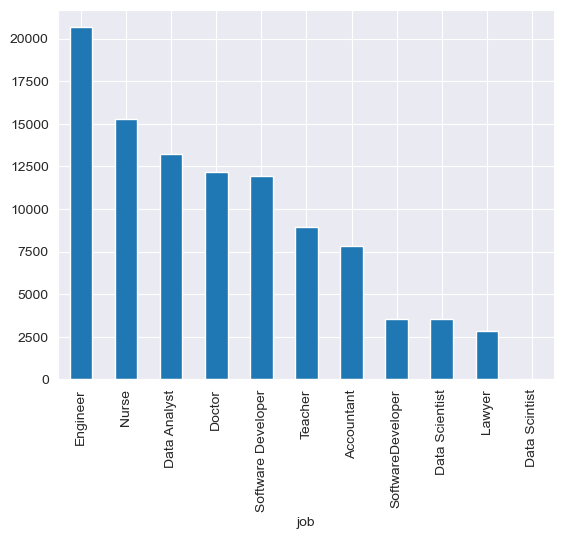

In [136]:
data["job"].value_counts().plot(kind="bar")

In [137]:
data['job'] = data['job'].str.replace(r'SoftwareDeveloper', 'Software Developer', regex=True)
data['job'] = data['job'].str.replace(r'Data Scintist', 'Data Scientist', regex=True)

In [138]:
data["job"].value_counts()

job
Engineer              20660
Software Developer    15496
Nurse                 15284
Data Analyst          13204
Doctor                12186
Teacher                8950
Accountant             7802
Data Scientist         3556
Lawyer                 2862
Name: count, dtype: int64

In [139]:
data['country'] = data['country'].str.replace(r'(?<!\w)Zim(?!\w)', 'Zimbabwe', regex=True)
data['country'] = data['country'].str.replace(r'zimbabwe', 'Zimbabwe', regex=True)

In [140]:
data.country.value_counts()

country
Zimbabwe    100000
Name: count, dtype: int64

In [141]:
data[data["marital_status"] == " "]

,disbursement_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults,remaining_term,salary,marital_status,age,loan_status
43,2023-10-12,USD,Zimbabwe,male,True,Accountant,Nyanga,53000.0,0,47908.382308,0.22,43,0,66,4029.182109,,43,Did not default
46,2022-09-07,USD,Zimbabwe,male,True,Nurse,Rusape,21000.0,2,32010.804079,0.21,46,2,41,2172.367370,,46,Did not default
56,2020-09-07,USD,Zimbabwe,female,True,Teacher,Marondera,40000.0,2,31575.202717,0.22,40,2,56,3502.570364,,40,Did not default
164,2021-08-07,USD,Zimbabwe,other,True,Nurse,Harare,35000.0,0,35203.459313,0.21,45,0,77,3965.866597,,45,Did not default
201,2020-06-26,USD,Zimbabwe,male,True,Software Developer,Chiredzi,26000.0,0,29219.996988,0.22,44,0,44,2462.567968,,44,Did not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99860,2022-12-14,USD,Zimbabwe,male,True,Nurse,Harare,26000.0,0,33869.045205,0.22,49,0,34,1966.933126,,49,Did not default
99905,2021-04-06,USD,Zimbabwe,male,True,Doctor,Mutare,30000.0,0,43916.108935,0.22,46,0,40,2279.161532,,46,Did not default
99975,2021-05-26,USD,Zimbabwe,male,True,Doctor,Chipinge,17000.0,0,29222.426824,0.22,41,0,47,2271.360413,,41,Did not default
99979,2021-08-17,USD,Zimbabwe,other,True,Data Analyst,Mutare,33000.0,0,36943.492191,0.20,46,0,68,3318.342155,,46,Did not default


In [142]:
# data["marital_status"] = data["marital_status"].replace({"yes": 1, "no": 0})
data["marital_status"] = data["marital_status"].replace(" ", np.NAN, regex=True)
data[data["marital_status"] == " "]

,disbursement_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults,remaining_term,salary,marital_status,age,loan_status


In [143]:
#drop all nan values from marital_status feature
data.dropna(inplace=True)

In [144]:
data.shape

(96873, 18)

In [145]:
data.loan_status.value_counts()

loan_status
Did not default    82486
Defaulted          14387
Name: count, dtype: int64

In [146]:
data['loan_status'] = data['loan_status'].str.replace(r'Did not default', 'did_not_default', regex=True)
data['loan_status'] = data['loan_status'].str.replace(r'Defaulted', 'defaulted', regex=True)

In [147]:
data['currency'] = data['currency'].str.replace(r'\$', '', regex=True)

In [148]:
data.currency.value_counts()

currency
USD    96873
Name: count, dtype: int64

### both the currency and country features have a single value for all records (USD for currency and Zimbabwe for country), these features are unlikely to provide meaningful predictive power for a credit score or any other target variable. Here’s why

* `Lack of Variability`: Machine learning models rely on variability in features to discern patterns and make predictions. If a feature has only one unique value (or very few unique values with overwhelming dominance), it doesn't contribute to distinguishing between different outcomes of the target variable. In your case, all records have the same value for both currency and country, so these features would not help in predicting credit scores.

* `No Discriminative Power`: Features that do not vary across records cannot differentiate between different instances or provide any information that correlates with the target variable (credit score). A feature like currency being USD for all records or country being Zimbabwe for all records does not provide any predictive power because there’s no variation to learn from.

* `Dimensionality Reduction`: In practical terms, keeping features that do not vary adds unnecessary complexity to your model without adding any value. It's generally preferable to remove such features to simplify the model and potentially improve its performance.

In [149]:
data.drop(columns=['country', 'currency'], inplace=True)

#### Dealing with outliers

In [150]:
data.dropna(inplace=True)

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96873 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   disbursement_date    96873 non-null  datetime64[ns]
 1   sex                  96873 non-null  object        
 2   is_employed          96873 non-null  bool          
 3   job                  96873 non-null  object        
 4   location             96873 non-null  object        
 5   loan_amount          96873 non-null  float64       
 6   number_of_defaults   96873 non-null  int64         
 7   outstanding_balance  96873 non-null  float64       
 8   interest_rate        96873 non-null  float64       
 9   age                  96873 non-null  int64         
 10  number_of_defaults   96873 non-null  int64         
 11  remaining_term       96873 non-null  int64         
 12  salary               96873 non-null  float64       
 13  marital_status       96873 non-null 

In [152]:
def plot_multiple_features(_features, _data):
    # Calculate the number of rows needed
    n_features = len(_features)
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division to ensure all features are included
    
    # Calculate the figure size
    fig_width = 10  # Adjust this based on your preference
    fig_height = n_rows * 5  # Adjust this based on the number of rows
    
    # Create subplots
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
    
    # Loop through each feature
    for i, feature in enumerate(_features):
        row = i // n_cols
        col = i % n_cols
    
        # Plot histogram with density plot
        sns.histplot(_data[feature], kde=True, bins=30, ax=axs[row, col])
    
        # Add title and labels
        axs[row, col].set_title('Distribution of ' + feature)
        axs[row, col].set_xlabel(feature)
        axs[row, col].set_ylabel("Count")
    
        # Add text annotation with comments and statistics
        stats = f"""
        feature: {feature}
        Std: {round(_data[feature].std(), 2)}
        Skewness: {round(_data[feature].skew(), 2)}
        Mean: {round(_data[feature].mean(), 2)}
        """
        
        axs[row, col].annotate(stats,
                               xy=(0.5, 0.5),
                               xycoords='axes fraction',
                               ha='center',
                               va='center',
                               fontsize=10,
                               fontfamily='sans-serif'
                               )
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

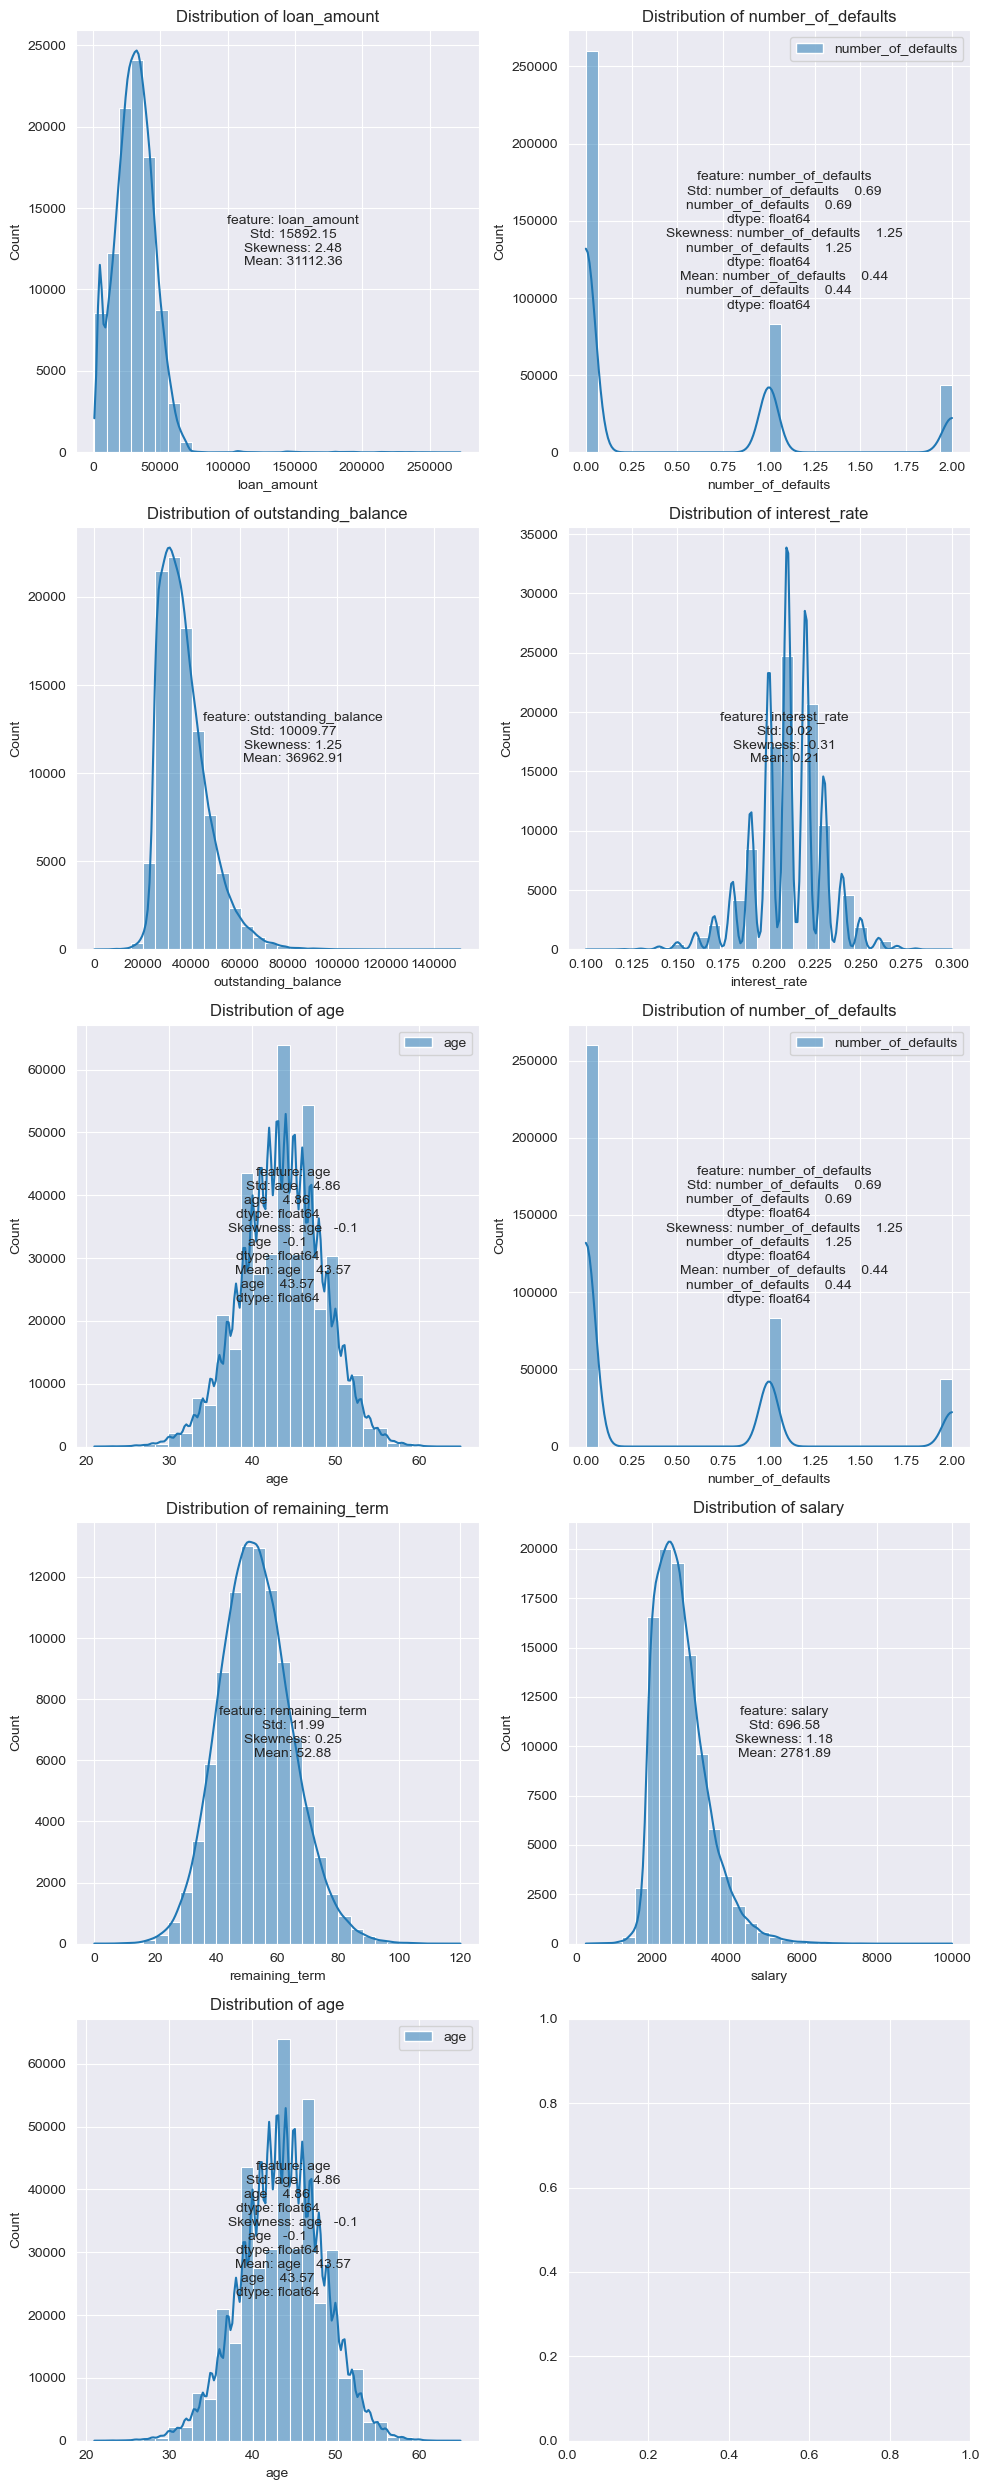

In [153]:
##### Understanding the distribution of each feature
# Define the list of features
features = data.select_dtypes(include=[int,float]).columns.to_list()

plot_multiple_features(features , data)

#### Dealing with features with potential skew
* Log Transformation: Applying a log transformation can help in reducing the skewness of a distribution, making it closer to a normal (Gaussian) distribution. This can improve the performance of many statistical and machine learning models that assume normality or benefit from it.

In [154]:
# Scale the data using the natural logarithm
# Columns to transform
columns_to_transform = ["outstanding_balance", "salary", "loan_amount"]

# Apply log transformation to each column individually
for col in columns_to_transform:
    data[col] = np.log(data[col] + 1)

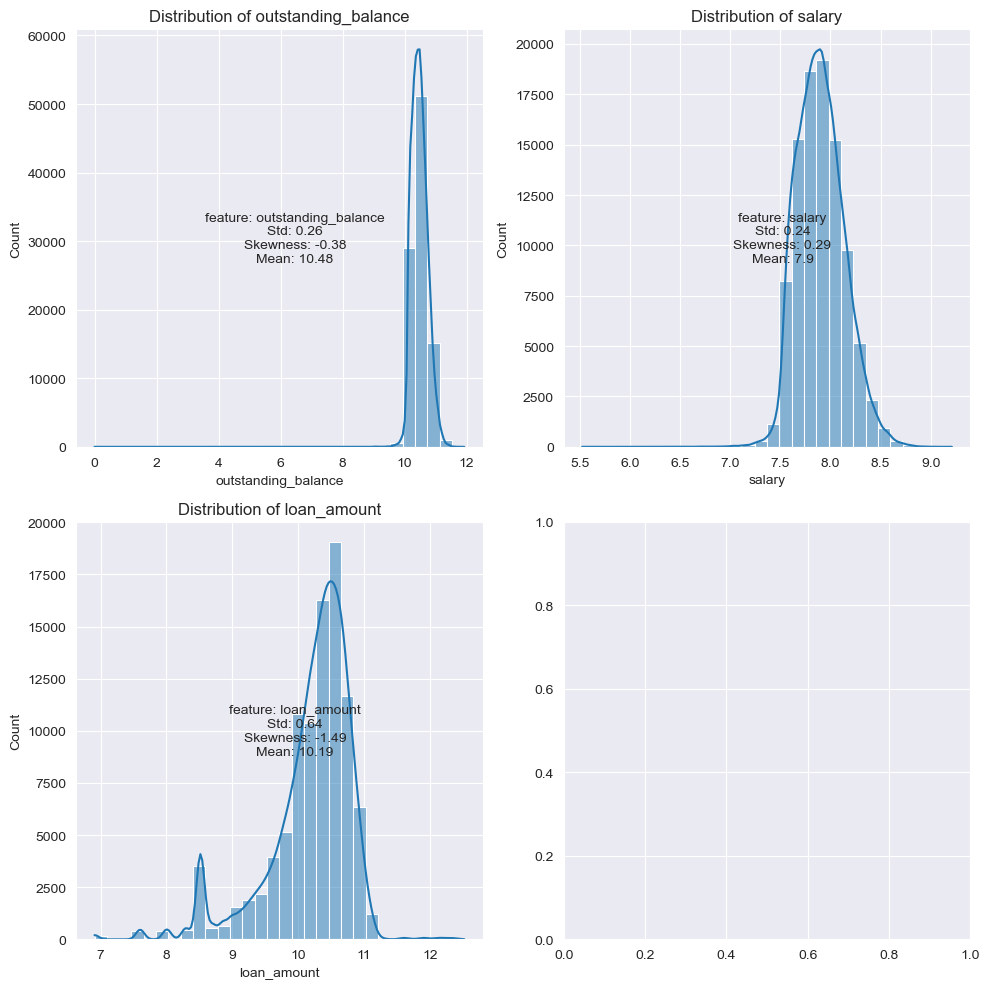

In [155]:
plot_multiple_features(columns_to_transform , data)

* Write your comments here like these features are now skewed zvakanaka etc

### Detecting and removing outliers 
* Using anomaly detection to detect and remove outliers from our dataset

In [156]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.1)  # Adjust contamination parameter
clf.fit(data[features])
outliers = clf.predict(data[features])

In [157]:
clean_data = data[outliers == 1]
outlier_data = data[outliers == -1]

#### Visualization of the removed outliers

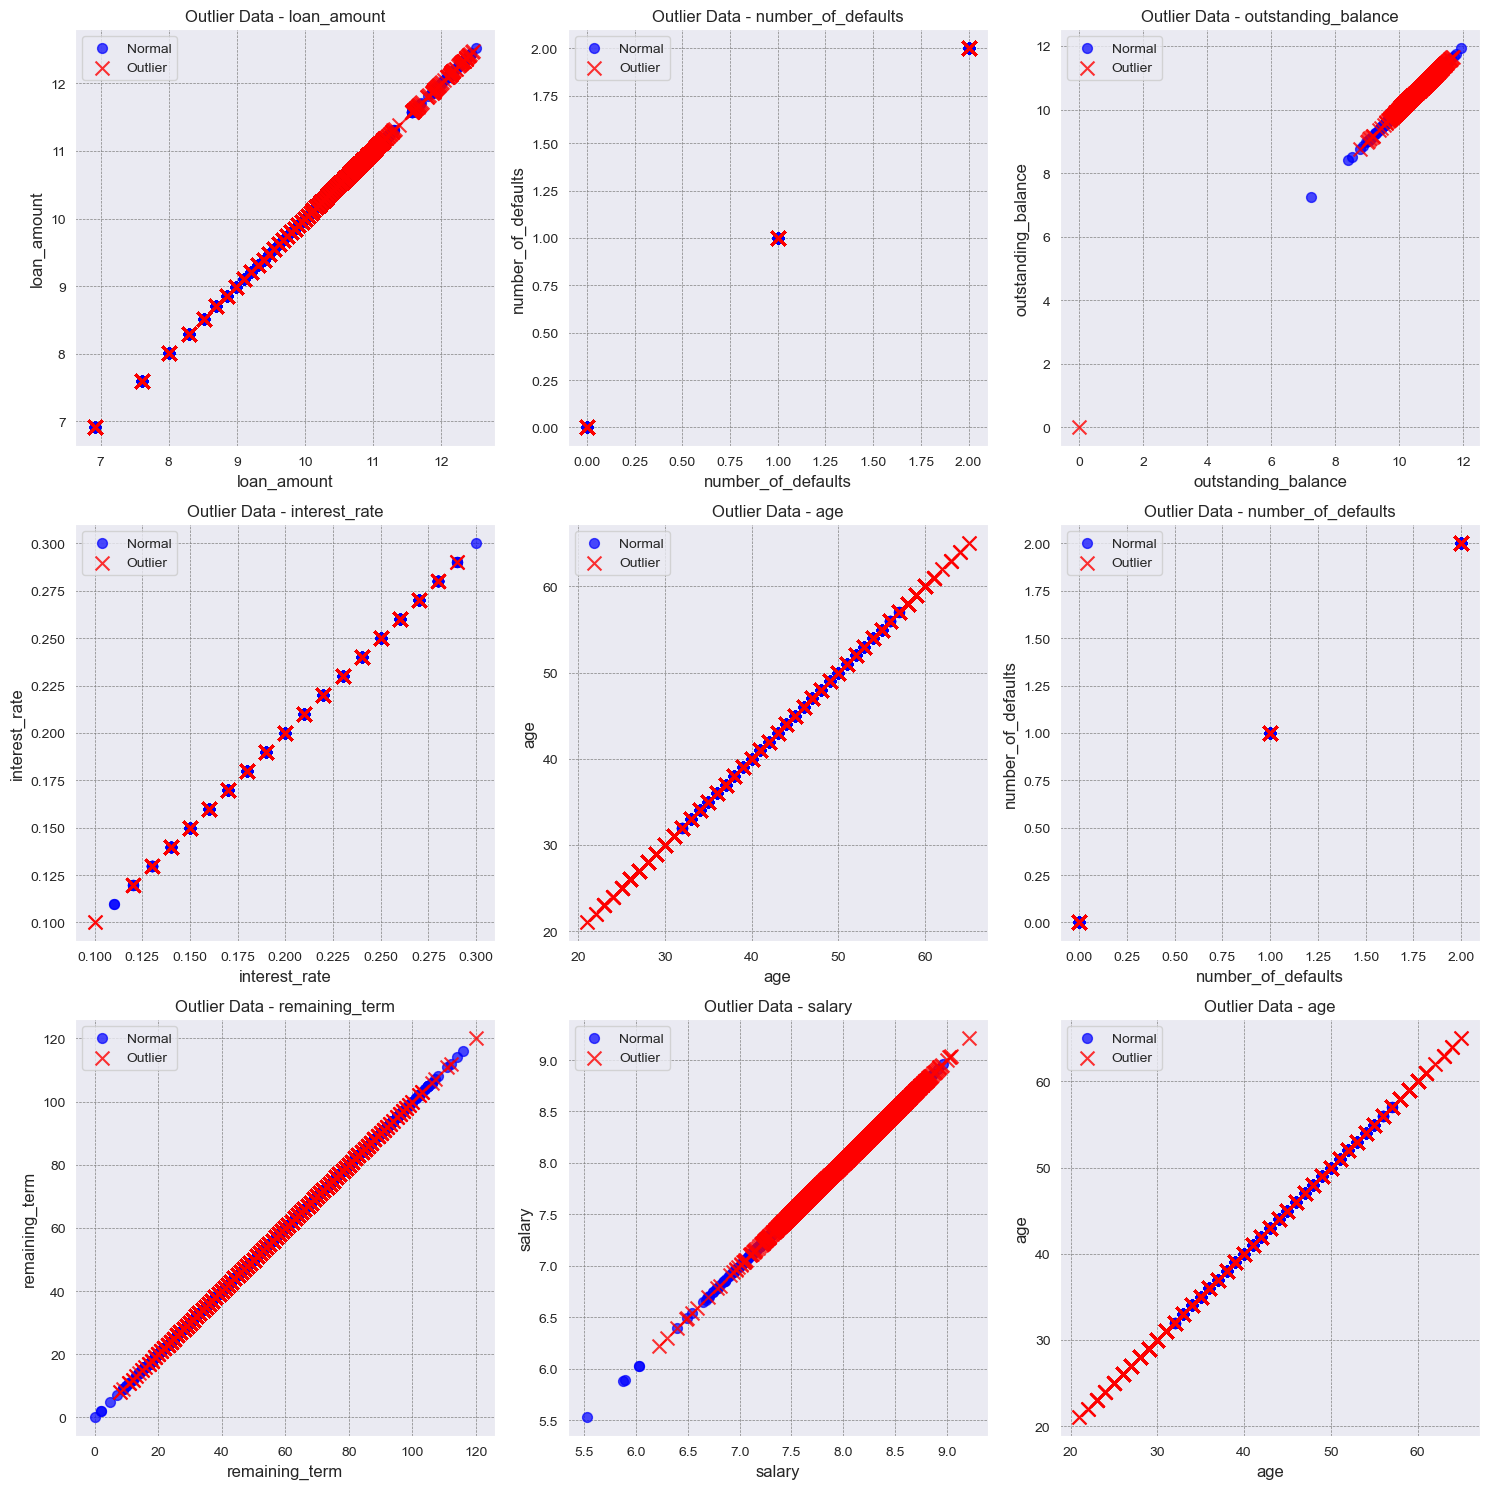

In [158]:
n_features = len(features)
nrows = 3  # Number of rows (adjust based on the number of features)
ncols = 3  # Number of columns (adjust based on the number of features)

# Check if number of subplots matches number of features
if n_features > nrows * ncols:
    raise ValueError(f"Number of features ({n_features}) exceeds available subplots ({nrows} rows, {ncols} cols)")

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))  # Create subplots

for i, feature in enumerate(features):
    # Calculate subplot index
    row = i // ncols
    col = i % ncols

    # Access each subplot using indexing
    ax = axes[row, col]

    # Normal data on subplot
    ax.scatter(clean_data[feature], clean_data[feature], color='blue', label='Normal', s=50, alpha=0.7, marker='o')
    ax.set_title(f'Normal Data - {feature}', fontsize=12)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel(feature, fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
    ax.legend(loc='upper left', fontsize=10)

    # Outliers on subplot
    ax.scatter(outlier_data[feature], outlier_data[feature], color='red', label='Outlier', s=100, alpha=0.8, marker='x')
    ax.set_title(f'Outlier Data - {feature}', fontsize=12)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel(feature, fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
    ax.legend(loc='upper left', fontsize=10)

# Adjust layout (optional)
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [159]:
clean_data.shape

(87185, 16)

##### Exploring the clean data by asking questions about the data
* NB: make sure to comment on your findings

In [160]:
clean_data.head()

,disbursement_date,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults,remaining_term,salary,marital_status,age,loan_status
0,2022-10-29,female,True,Teacher,Beitbridge,10.571343,0,10.792490,0.22,37,0,47,8.080559,married,37,did_not_default
1,2020-06-06,other,True,Teacher,Harare,10.203629,2,10.266500,0.20,43,2,62,8.069386,single,43,did_not_default
2,2023-09-29,other,True,Nurse,Gweru,10.463132,1,10.709931,0.22,43,1,57,8.111276,married,43,did_not_default
3,2022-06-22,female,True,Doctor,Rusape,10.085851,0,10.482416,0.23,47,0,42,7.717706,divorced,47,did_not_default
4,2023-02-08,male,True,Nurse,Chipinge,9.852247,0,10.438724,0.20,42,0,45,7.745807,married,42,did_not_default


#### What are the job of those who have a higher number of loans

<Figure size 1000x600 with 0 Axes>

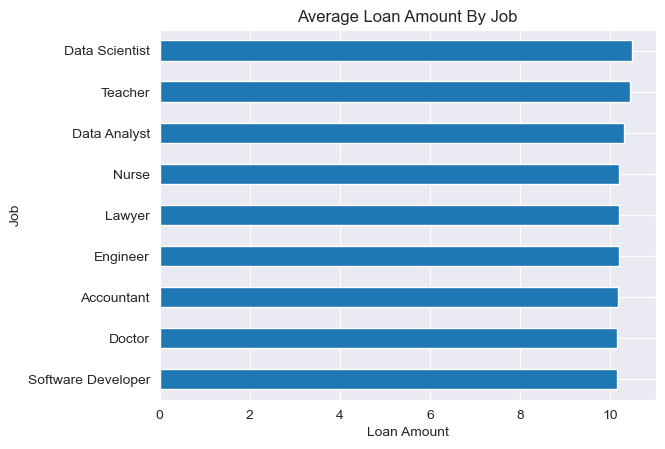

In [161]:

# Group by 'job' and calculate average loan amount and count of individuals
loan_stats = clean_data.groupby('job')['loan_amount'].agg(['mean', 'count'])

# Filter occupations with at least 2 individuals
loan_stats = loan_stats[loan_stats['count'] >= 2]  # Adjust threshold as per your data

# Sort by average loan amount
loan_stats_sorted = loan_stats.sort_values('mean')

# Set the figure size before plotting
plt.figure(figsize=(10, 6))  # Width, height in inches

# Plotting
loan_stats_sorted.plot(kind='barh', y='mean', title='Average Loan Amount By Job', legend=False)

plt.xlabel('Loan Amount')
plt.ylabel('Job')
plt.show()


#### How does loan status vary by location

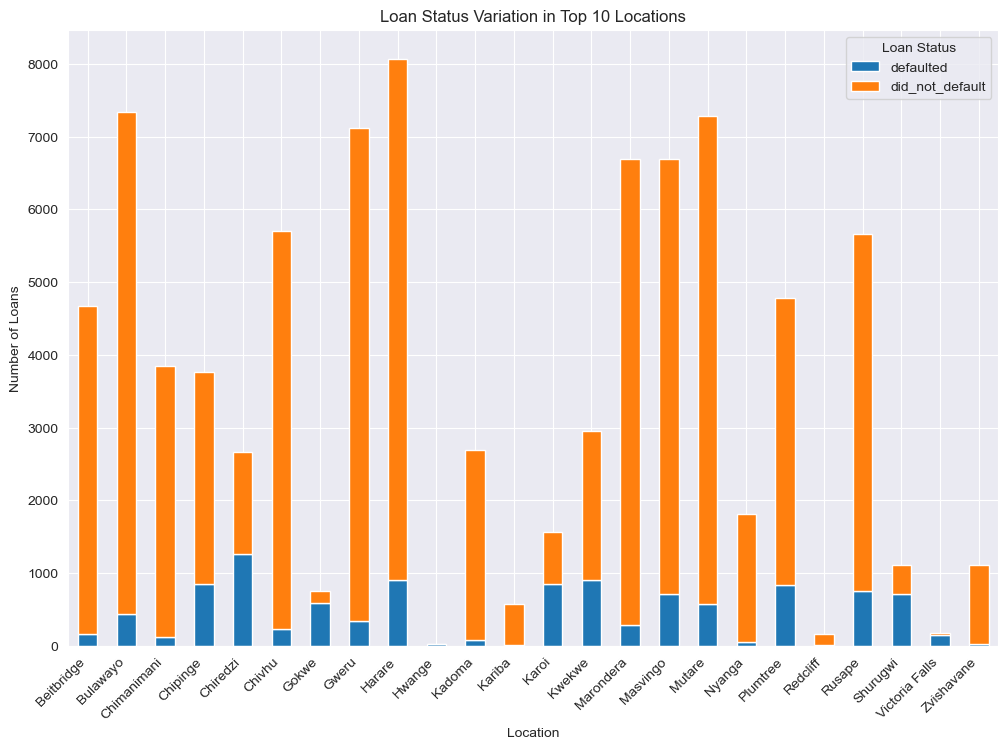

In [162]:
# Count loans by location
loan_counts_by_location = clean_data['location'].value_counts()

# Select top 10 locations by loan count
top_10_locations = loan_counts_by_location.head(24)

# Filter data for top 10 locations
df_top_10 = clean_data[clean_data['location'].isin(top_10_locations.index)]

# Group by 'location' and 'loan_status', then unstack for plotting
loan_status_by_location = df_top_10.groupby(['location', 'loan_status']).size().unstack()

# Plotting
loan_status_by_location.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Loan Status Variation in Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.legend(title='Loan Status')
plt.show()

### Is there a relationship between interest rate and loan amount?

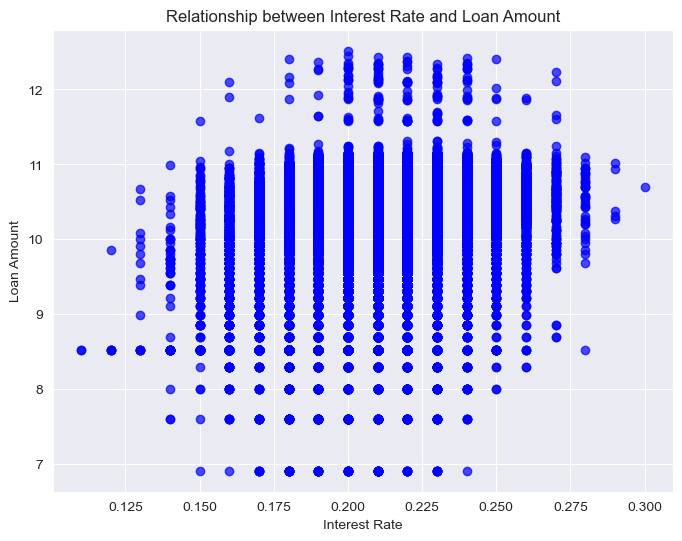

In [163]:
# Scatter plot of interest rate vs loan amount
plt.figure(figsize=(8, 6))
plt.scatter(clean_data['interest_rate'], clean_data['loan_amount'], color='b', alpha=0.7)
plt.title('Relationship between Interest Rate and Loan Amount')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()


#### What is the distribution of salaries among employed vs unemployed individuals?

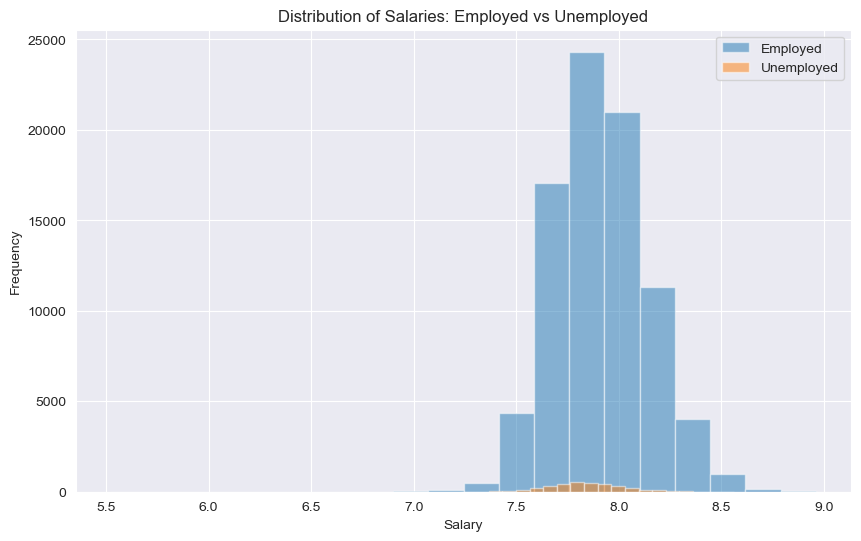

In [164]:
# Separate data by employment status
employed_salaries = clean_data[clean_data['is_employed']]['salary']
unemployed_salaries = clean_data[~clean_data['is_employed']]['salary']

# Plotting histograms
plt.figure(figsize=(10, 6))
plt.hist(employed_salaries, bins=20, alpha=0.5, label='Employed')
plt.hist(unemployed_salaries, bins=20, alpha=0.5, label='Unemployed')
plt.title('Distribution of Salaries: Employed vs Unemployed')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#### Which location has the highest number of loans disbursed?

In [165]:
# Count loans by location
loan_counts_by_location = clean_data['location'].value_counts()

# Identify location with the highest loan count
location_with_most_loans = loan_counts_by_location.idxmax()

print(f"Location '{location_with_most_loans}' has the highest number of loans disbursed.")


Location 'Harare' has the highest number of loans disbursed.


## Feature Engineering

### Feature Extraction

In [166]:
clean_data.loc[:, 'loan_to_income_ratio'] = round(clean_data['loan_amount'] / clean_data['salary'], 1)

C:\Users\kudzai\AppData\Local\Temp\ipykernel_852\1028097130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.loc[:, 'loan_to_income_ratio'] = round(clean_data['loan_amount'] / clean_data['salary'], 1)


In [167]:
# Define a threshold for outstanding_balance to determine delinquency
outstanding_balances = clean_data['outstanding_balance'].values

# Calculate the 95th percentile of outstanding_balance
delinquency_threshold = np.percentile(outstanding_balances, 95)

# Create binary delinquency feature using .loc for assignment
clean_data.loc[:, 'is_delinquent'] = (clean_data['outstanding_balance'] > delinquency_threshold).astype(int)

C:\Users\kudzai\AppData\Local\Temp\ipykernel_852\2436964067.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.loc[:, 'is_delinquent'] = (clean_data['outstanding_balance'] > delinquency_threshold).astype(int)


* `Loan-to-income ratio`: Divide loan_amount by salary to assess the borrower's ability to repay the loan relative to their income. A higher ratio indicates a higher risk of default.
* `Payment delinquency`: Create a binary feature (1 for delinquent, 0 for not delinquent) based on a threshold for outstanding_balance or overdue payments (if available). This indicates a potential repayment issue.

In [168]:
# Use .loc for assignment to avoid SettingWithCopyWarning
clean_data.loc[:, 'year'] = clean_data['disbursement_date'].dt.year
clean_data.loc[:, 'month'] = clean_data['disbursement_date'].dt.month
clean_data.loc[:, 'day'] = clean_data['disbursement_date'].dt.day
clean_data.loc[:,'quarter'] = clean_data['disbursement_date'].dt.quarter
clean_data.loc[:,'day_of_week'] = clean_data['disbursement_date'].dt.dayofweek

C:\Users\kudzai\AppData\Local\Temp\ipykernel_852\2058772886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.loc[:, 'year'] = clean_data['disbursement_date'].dt.year
C:\Users\kudzai\AppData\Local\Temp\ipykernel_852\2058772886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.loc[:, 'month'] = clean_data['disbursement_date'].dt.month
C:\Users\kudzai\AppData\Local\Temp\ipykernel_852\2058772886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [169]:
# Drop the disbursement_date feature to reduce redundancy 
clean_data.drop(columns = ["disbursement_date"], inplace=True)

C:\Users\kudzai\AppData\Local\Temp\ipykernel_852\278995020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(columns = ["disbursement_date"], inplace=True)


* `Year (year)`:
Usefulness:
Captures the specific year when the loan was disbursed.
Reflects macroeconomic conditions, policy changes, and overall economic stability, which can influence borrowers' ability to repay loans.
Example:
Economic downturns or recessions in certain years may lead to higher default rates due to increased unemployment or decreased consumer spending.

* `Month (month)`:
Usefulness:
Indicates the month when the loan was disbursed.
Captures seasonal trends, consumer behavior, and economic activities that vary throughout the year.
Example:
Loans disbursed around holiday seasons (e.g., December) might have higher default rates due to increased spending on gifts and travel, impacting borrowers' finances.

* `Day (day)`:
Usefulness:
Specifies the day of the month when the loan was disbursed.
Can capture end-of-month effects on borrower finances, salary payments, or other financial behaviors.
Example:
Loans disbursed at the end of the month might coincide with payday for many borrowers, potentially lowering default rates as borrowers have more funds available.

* `Quarter (quarter)`:
Usefulness:
Indicates the quarter of the year when the loan was disbursed (Q1 to Q4).
Provides a broader seasonal view compared to the month, capturing trends and economic conditions over three-month periods.
Example:
Loans disbursed in Q4 (October to December) might experience different repayment dynamics due to holiday spending and year-end financial planning.

* `Day of the Week (day_of_week)`:
Usefulness:
Specifies the day of the week (Monday to Sunday) when the loan was disbursed.
Captures weekly patterns in borrower behavior, financial transactions, and spending habits.
Example:
Loans disbursed at the end of the week (e.g., Thursday or Friday) might exhibit different default patterns due to the timing of payments and borrower spending behavior over weekends.

In [170]:
clean_data.head()

,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults,...,marital_status,age,loan_status,loan_to_income_ratio,is_delinquent,year,month,day,quarter,day_of_week
0,female,True,Teacher,Beitbridge,10.571343,0,10.792490,0.22,37,0,...,married,37,did_not_default,1.3,0,2022,10,29,4,5
1,other,True,Teacher,Harare,10.203629,2,10.266500,0.20,43,2,...,single,43,did_not_default,1.3,0,2020,6,6,2,5
2,other,True,Nurse,Gweru,10.463132,1,10.709931,0.22,43,1,...,married,43,did_not_default,1.3,0,2023,9,29,3,4
3,female,True,Doctor,Rusape,10.085851,0,10.482416,0.23,47,0,...,divorced,47,did_not_default,1.3,0,2022,6,22,2,2
4,male,True,Nurse,Chipinge,9.852247,0,10.438724,0.20,42,0,...,married,42,did_not_default,1.3,0,2023,2,8,1,2


In [171]:
clean_data = clean_data.loc[:, ~clean_data.columns.duplicated(keep='first')]

In [172]:
clean_data.head()

,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining_term,salary,marital_status,loan_status,loan_to_income_ratio,is_delinquent,year,month,day,quarter,day_of_week
0,female,True,Teacher,Beitbridge,10.571343,0,10.792490,0.22,37,47,8.080559,married,did_not_default,1.3,0,2022,10,29,4,5
1,other,True,Teacher,Harare,10.203629,2,10.266500,0.20,43,62,8.069386,single,did_not_default,1.3,0,2020,6,6,2,5
2,other,True,Nurse,Gweru,10.463132,1,10.709931,0.22,43,57,8.111276,married,did_not_default,1.3,0,2023,9,29,3,4
3,female,True,Doctor,Rusape,10.085851,0,10.482416,0.23,47,42,7.717706,divorced,did_not_default,1.3,0,2022,6,22,2,2
4,male,True,Nurse,Chipinge,9.852247,0,10.438724,0.20,42,45,7.745807,married,did_not_default,1.3,0,2023,2,8,1,2


### Feature analysis

In [173]:
numerical_features = clean_data.select_dtypes(include=[int,float]).columns.to_list()
string_features = clean_data.select_dtypes(include=[object]).columns.to_list()

#### Correlation Analysis

In [174]:
corr_matrix = clean_data[numerical_features].corr()
corr_matrix

,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining_term,salary,loan_to_income_ratio,is_delinquent,year,month,day,quarter,day_of_week
loan_amount,1.000000,0.026842,0.543677,0.194496,-0.002063,0.015978,0.538382,0.787434,0.220321,0.001879,0.006777,0.001358,0.005928,-0.001798
number_of_defaults,0.026842,1.000000,-0.004128,0.004894,-0.004713,0.011667,0.015718,0.022761,-0.041465,0.001186,-0.000258,-0.004569,-0.000924,-0.000102
outstanding_balance,0.543677,-0.004128,1.000000,0.112844,-0.006247,0.008236,0.314224,0.409965,0.514311,-0.003020,0.001363,0.001481,-0.000243,-0.000871
interest_rate,0.194496,0.004894,0.112844,1.000000,-0.009499,0.032265,0.194009,0.109943,0.044372,0.003263,0.006885,0.002745,0.006928,0.001566
age,-0.002063,-0.004713,-0.006247,-0.009499,1.000000,-0.054512,-0.205039,0.097962,-0.010623,-0.005840,0.002522,-0.002033,0.003256,0.004725
remaining_term,0.015978,0.011667,0.008236,0.032265,-0.054512,1.000000,0.757650,-0.367794,0.002185,-0.003552,0.004644,0.001446,0.005181,-0.001673
salary,0.538382,0.015718,0.314224,0.194009,-0.205039,0.757650,1.000000,0.046889,0.145080,0.000074,0.005898,0.000422,0.005731,0.000588
loan_to_income_ratio,0.787434,0.022761,0.409965,0.109943,0.097962,-0.367794,0.046889,1.000000,0.150061,0.001455,0.002209,0.001102,0.001916,-0.003027
is_delinquent,0.220321,-0.041465,0.514311,0.044372,-0.010623,0.002185,0.145080,0.150061,1.000000,-0.004198,0.004013,0.006385,0.002360,-0.001402
year,0.001879,0.001186,-0.003020,0.003263,-0.005840,-0.003552,0.000074,0.001455,-0.004198,1.000000,0.004392,0.000762,0.004037,0.002013


<Axes: >

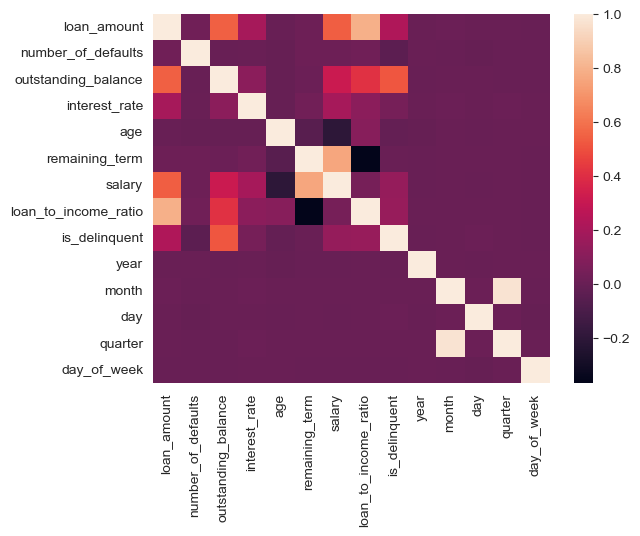

In [175]:
sns.heatmap(corr_matrix)

* Make sure to comment on the foundings

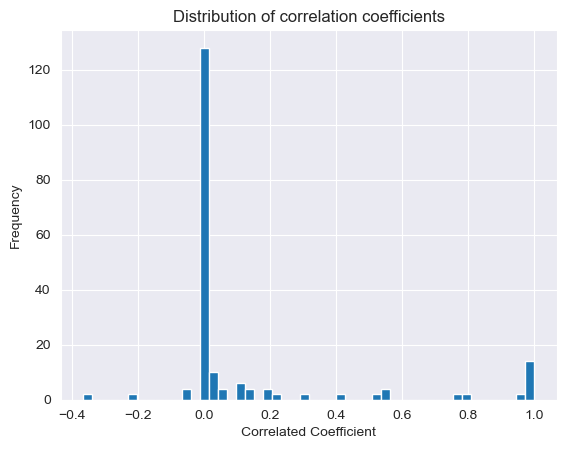

In [176]:
plt.hist(corr_matrix.values.flatten(), bins=50)
plt.xlabel("Correlated Coefficient")
plt.ylabel("Frequency")
plt.title("Distribution of correlation coefficients")
plt.show()

* Above identify patterns and deciding on a threshold for removing highly correlated features. The histogram will show you how many pairs of features fall into different correlation ranges, making it easier to see if there are many highly correlated pairs that might need to be addressed.

In [177]:
# Calculate the threshold
mean_corr = np.mean(corr_matrix.values.flatten())
std_corr = np.std(corr_matrix.values.flatten())
# Setting threshold based on distribution

# Approximately 95% of the data lies within ±2 standard deviations from the mean.
threshold = mean_corr +2 * std_corr
threshold

0.7356708894249285

In [178]:
# remove correlated features to reduce the feature space
def correlation(dataset, _threshold):
    col_corr = set()  # Set of all the names of correlated columns
    _corr_matrix = dataset.corr()
    for i in range(len(_corr_matrix.columns)):
        for j in range(i):
            if abs(_corr_matrix.iloc[i, j]) > _threshold: # we are interested in absolute coeff value
                colname = _corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(data[features], threshold)
print('correlated features: ', len(set(corr_features)) )

correlated features:  3


In [179]:
corr_features

{'age', 'number_of_defaults', 'salary'}

In [180]:
# remove correlated features
data.drop(labels=corr_features, axis=1, inplace=True)

* Removing highly correlated features when predicting default risk is crucial because it reduces multicollinearity, leading to more stable and reliable model parameters. This simplification helps prevent overfitting, allowing the model to generalize better to new data and improve predictive performance. Additionally, it enhances interpretability by eliminating redundant information, making it easier to identify the key factors influencing default risk. Reducing the feature space also decreases computation time, making the modeling process more efficient.

#### Feature selection

In [181]:
import pandas as pd

# Assuming clean_data is your DataFrame

sex = {'male': 1, 'female': 2, 'other': 3}
clean_data.loc[:, 'sex'] = clean_data['sex'].map(sex).astype(int)

job = {
    "Accountant": 1,
    "Data Analyst": 2,
    "Data Scientist": 3,
    "Doctor": 4,
    "Engineer": 5,
    "Lawyer": 6,
    "Nurse": 7,
    "Software Developer": 8,
    "Teacher": 9
}
clean_data.loc[:, 'job'] = clean_data['job'].map(job).astype(int)

location = {
    "Beitbridge": 1,
    "Bulawayo": 2,
    "Chimanimani": 3,
    "Chipinge": 4,
    "Chiredzi": 5,
    "Chivhu": 6,
    "Gokwe": 7,
    "Gweru": 8,
    "Harare": 9,
    "Hwange": 10,
    "Kadoma": 11,
    "Kariba": 12,
    "Karoi": 13,
    "Kwekwe": 14,
    "Marondera": 15,
    "Masvingo": 16,
    "Mutare": 17,
    "Nyanga": 18,
    "Plumtree": 19,
    "Redcliff": 20,
    "Rusape": 21,
    "Shurugwi": 22,
    "Victoria Falls": 23,
    "Zvishavane": 24
}
clean_data.loc[:, 'location'] = clean_data['location'].map(location).astype(int)

marital_status = {'divorced': 1, 'married': 2, 'single': 3}
clean_data.loc[:, 'marital_status'] = clean_data['marital_status'].map(marital_status).astype(int)

loan_status = {'defaulted': 0, 'did_not_default': 1}
clean_data.loc[:, 'loan_status'] = clean_data['loan_status'].map(loan_status).astype(int)

clean_data.loc[:, "is_employed"] = clean_data["is_employed"].astype(int)


In [182]:
clean_data.loan_status = pd.to_numeric(clean_data.loan_status)
clean_data.sex = pd.to_numeric(clean_data.sex)
clean_data.job = pd.to_numeric(clean_data.job)
clean_data.marital_status = pd.to_numeric(clean_data.marital_status)
clean_data.location = pd.to_numeric(clean_data.location)

In [183]:
clean_data.head()

,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining_term,salary,marital_status,loan_status,loan_to_income_ratio,is_delinquent,year,month,day,quarter,day_of_week
0,2,1,9,1,10.571343,0,10.792490,0.22,37,47,8.080559,2,1,1.3,0,2022,10,29,4,5
1,3,1,9,9,10.203629,2,10.266500,0.20,43,62,8.069386,3,1,1.3,0,2020,6,6,2,5
2,3,1,7,8,10.463132,1,10.709931,0.22,43,57,8.111276,2,1,1.3,0,2023,9,29,3,4
3,2,1,4,21,10.085851,0,10.482416,0.23,47,42,7.717706,1,1,1.3,0,2022,6,22,2,2
4,1,1,7,4,9.852247,0,10.438724,0.20,42,45,7.745807,2,1,1.3,0,2023,2,8,1,2


In [184]:
X = clean_data.drop(columns=['loan_status'])
y = clean_data['loan_status']

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [186]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [188]:
# Example: Initialize Logistic Regression model
lr = LogisticRegression(max_iter=1000)

In [189]:
# Example: Perform RFE with logistic regression
rfe = RFE(estimator=lr, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)

In [190]:
# Example: Get selected features
selected_features = X.columns[rfe.support_]
print("Selected features:")
print(selected_features)

Selected features:
Index(['is_employed', 'location', 'number_of_defaults', 'interest_rate', 'age',
       'remaining_term', 'salary', 'marital_status', 'loan_to_income_ratio',
       'is_delinquent'],
      dtype='object')


## Building the model

In [191]:
from sklearn.metrics import precision_score, recall_score, f1_score


def evaluate_preds(y_true, y_preds):
    """
    performs evaluation comparison on y_true labels vs y_preds labels 
    """
    accuracy    =   accuracy_score(y_true, y_preds)
    precision   =   precision_score(y_test, y_preds,average="micro")
    recall      =   recall_score(y_test, y_preds, average="micro")
    f1          =   f1_score(y_test, y_preds, average="micro")

    matrix_ev_dict = dict({
        "accuracy"    : round(accuracy,2),
        "precision"   : round(precision,2),
        "recall"      : round(recall,2),
        "f1"          : round(f1,2)
    })

    print(f'Accuracy {round(accuracy*100, 2)}%')
    print(f'Precision: {round(precision*100,2)}%')
    print(f'Recall: {round(recall*100,2)}%')
    print(f'F1: {round(f1*100,2)}%')

    return matrix_ev_dict

In [192]:
sf = ['is_employed', 'location', 'number_of_defaults', 'interest_rate', 'age',
      'remaining_term', 'salary', 'marital_status', 'loan_to_income_ratio',
      'is_delinquent', 'loan_status']
train_data = clean_data[sf]

# Shuffle data for better results
train_data = train_data.sample(frac=1).copy()
train_data.reset_index(drop=True, inplace=True)

In [193]:
_X = train_data.drop(columns=['loan_status'])
_y = train_data['loan_status']

scaler = StandardScaler()
_X_scaled = scaler.fit_transform(_X)

_X_train, _X_test, _y_train, _y_test = train_test_split(_X_scaled, _y, test_size=0.2, random_state=42)


## Data Drifts Detection

In [194]:
from scipy import stats


# Function to detect data drift
def detect_data_drift(X_train, X_test, threshold=0.05):
    drift_detected = False
    num_features = X_train.shape[1]  # Number of features

    for i in range(num_features):
        feature_train = X_train[:, i]
        feature_test = X_test[:, i]

        # Calculate statistical properties for the feature in both datasets
        mean_train = np.mean(feature_train)
        mean_test = np.mean(feature_test)

        std_train = np.std(feature_train)
        std_test = np.std(feature_test)

        # Compare distributions using KS test
        ks_stat, p_value = stats.ks_2samp(feature_train, feature_test)

        # Print results for each feature
        print(f"Feature {i}:")
        print(f"Mean difference: {np.abs(mean_train - mean_test):.4f}")
        print(f"Std deviation difference: {np.abs(std_train - std_test):.4f}")
        print(f"KS statistic: {ks_stat:.4f}, p-value: {p_value:.4f}")

        # Check if drift exceeds threshold
        if p_value < threshold:
            drift_detected = True
            print(f"Data drift detected for feature {i}!")
        else:
            print(f"No significant data drift for feature {i}")

    return drift_detected

# Detect data drift between _X_train and _X_test
drift_detected = detect_data_drift(_X_train, _X_test)

if drift_detected:
    print("Data drift detected. Consider re-evaluating the model.")
else:
    print("No significant data drift detected. Model performance remains stable.")

Feature 0:
Mean difference: 0.0049
Std deviation difference: 0.0116
KS statistic: 0.0009, p-value: 1.0000
No significant data drift for feature 0
Feature 1:
Mean difference: 0.0037
Std deviation difference: 0.0007
KS statistic: 0.0037, p-value: 0.9915
No significant data drift for feature 1
Feature 2:
Mean difference: 0.0017
Std deviation difference: 0.0013
KS statistic: 0.0016, p-value: 1.0000
No significant data drift for feature 2
Feature 3:
Mean difference: 0.0135
Std deviation difference: 0.0049
KS statistic: 0.0079, p-value: 0.3535
No significant data drift for feature 3
Feature 4:
Mean difference: 0.0002
Std deviation difference: 0.0083
KS statistic: 0.0063, p-value: 0.6302
No significant data drift for feature 4
Feature 5:
Mean difference: 0.0070
Std deviation difference: 0.0060
KS statistic: 0.0066, p-value: 0.5764
No significant data drift for feature 5
Feature 6:
Mean difference: 0.0169
Std deviation difference: 0.0016
KS statistic: 0.0094, p-value: 0.1683
No significant dat

*No Significant Data Drift Detected:*
- The small mean differences, low standard deviation differences, low KS statistics, and high p-values collectively indicate that the distributions of Feature 8 and Feature 9 are similar between `_X_train` (training data) and `_X_test` (test data).

*Stable Model Performance:*
- Since no significant data drift is detected, the model trained on `_X_train` is likely to perform consistently well on `_X_test`, assuming the datasets are representative of the same underlying distribution.


##### Using `class_weight='balanced'` to handle Unbalanced Classification
- When you set class_weight='balanced', the classifier adjusts the weights inversely proportional to class frequencies. In other words, it assigns higher weights to minority class instances and lower weights to majority class instances during training. This adjustment allows the classifier to pay more attention to minority class examples and thus improve its ability to correctly classify them.

In [195]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
evaluation = []
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, class_weight='balanced')  # Enable probability estimates for ROC-AUC calculation
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(_X_train, _y_train)
    y_pred = model.predict(_X_test)

    # Evaluate model performance
    # Append the evaluation inside the evaluation array
    evaluation.append(evaluate_preds(_y_test, y_pred))
    
    train_score = model.score(_X_train, _y_train)
    test_score = model.score(_X_test, _y_test)
    print("+++++++++++++++++++++++++++++++++++++++++++")
    print(f"Train accuracy: {train_score:.2f}")
    print(f"Test accuracy: {test_score:.2f}")
    print("\n")

Training Logistic Regression...
Accuracy 65.32%
Precision: 59.55%
Recall: 59.55%
F1: 59.55%
+++++++++++++++++++++++++++++++++++++++++++
Train accuracy: 0.66
Test accuracy: 0.65


Training Decision Tree...
Accuracy 85.87%
Precision: 78.12%
Recall: 78.12%
F1: 78.12%
+++++++++++++++++++++++++++++++++++++++++++
Train accuracy: 1.00
Test accuracy: 0.86


Training Random Forest...
Accuracy 90.18%
Precision: 83.61%
Recall: 83.61%
F1: 83.61%
+++++++++++++++++++++++++++++++++++++++++++
Train accuracy: 1.00
Test accuracy: 0.90


Training Gradient Boosting...
Accuracy 90.41%
Precision: 84.23%
Recall: 84.23%
F1: 84.23%
+++++++++++++++++++++++++++++++++++++++++++
Train accuracy: 0.91
Test accuracy: 0.90


Training SVM...
Accuracy 76.54%
Precision: 67.37%
Recall: 67.37%
F1: 67.37%


KeyboardInterrupt: 

<Axes: >

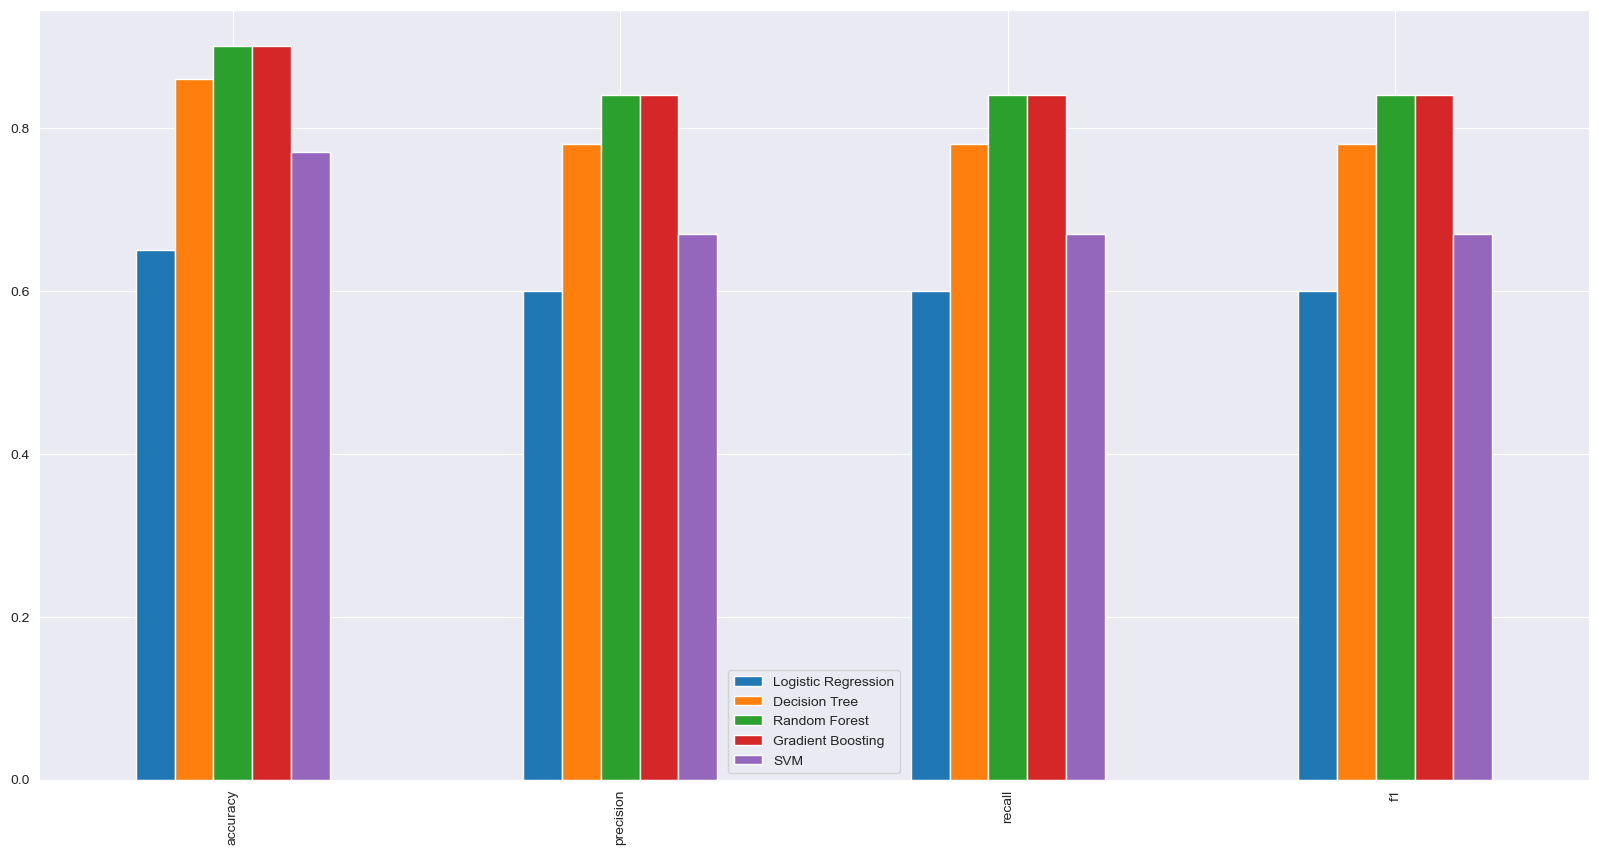

In [196]:
compare_metrics = pd.DataFrame({
    "Logistic Regression" : evaluation[0],
    "Decision Tree": evaluation[1],
    "Random Forest": evaluation[2],
    "Gradient Boosting": evaluation[3],
    "SVM": evaluation[4],
})

compare_metrics.plot.bar(figsize=(20,10))

Based on the evaluation metrics (accuracy, precision, recall, F1-score), both Random Forest and Gradient Boosting perform exceptionally well. However, I will choose Random Forest over Gradient Boosting for the following reasons:

- **Performance Metrics**: Random Forest demonstrates superior performance across all metrics with an accuracy of 90.18%, precision of 83.61%, recall of 83.61%, and F1-score of 83.61%. This slightly outperforms Gradient Boosting, which has an accuracy of 90.41%, precision of 84.23%, recall of 84.23%, and F1-score of 84.23%.

- **Class Weight Support**: Random Forest supports `class_weight='balanced'`, allowing it to effectively handle the unbalanced classification scenario. This capability ensures that the model gives appropriate importance to both classes (`default` and `non-default`), leading to a more robust and balanced prediction performance.

- **Training Accuracy and Generalization**: While Random Forest achieves perfect training accuracy (100%), indicating strong fit to the training data, it still maintains high performance on the test set (90% accuracy). This suggests it can generalize well to unseen data despite its high training accuracy.

Therefore, Random Forest's overall superior performance across multiple metrics, coupled with its support for `class_weight='balanced'`, makes it the preferred model choice from the evaluated options.


In [242]:
# Predicting with a specific model "Gradient Boosting Classifier"
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(_X_train, _y_train)
y_preds = rf.predict(_X_test)

#Evaluate base gradient boosting model
base_metrics_gb = evaluate_preds(_y_test, y_preds)

Accuracy 90.18%
Precision: 83.61%
Recall: 83.61%
F1: 83.61%


### Tuning model for better performance

#### Hyperparameter Tuning with RandomizedSearchCv

In [232]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    "n_estimators": [100, 200],  # Fewer options since 500 might be excessive
    "max_depth": [None, 10, 20],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "class_weight": ['balanced', 'balanced_subsample'],  # Good for handling class imbalance
    "criterion": ["gini", "entropy"],  # Standard criteria for decision trees
}


# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=1)

# Fit GridSearchCV to find the best parameters
grid_search.fit(_X_train, _y_train)


Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.8s
[CV] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.5s
[CV] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.6s
[CV] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.4s
[CV] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.5s
[CV] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estima

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

In [233]:
# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on test set
y_preds = grid_search.best_estimator_.predict(_X_test)
final_metrics = evaluate_preds(_y_test, y_preds)


Best parameters found:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.90
Accuracy 90.31%
Precision: 82.15%
Recall: 82.15%
F1: 82.15%


## Model Evaluation

<Axes: >

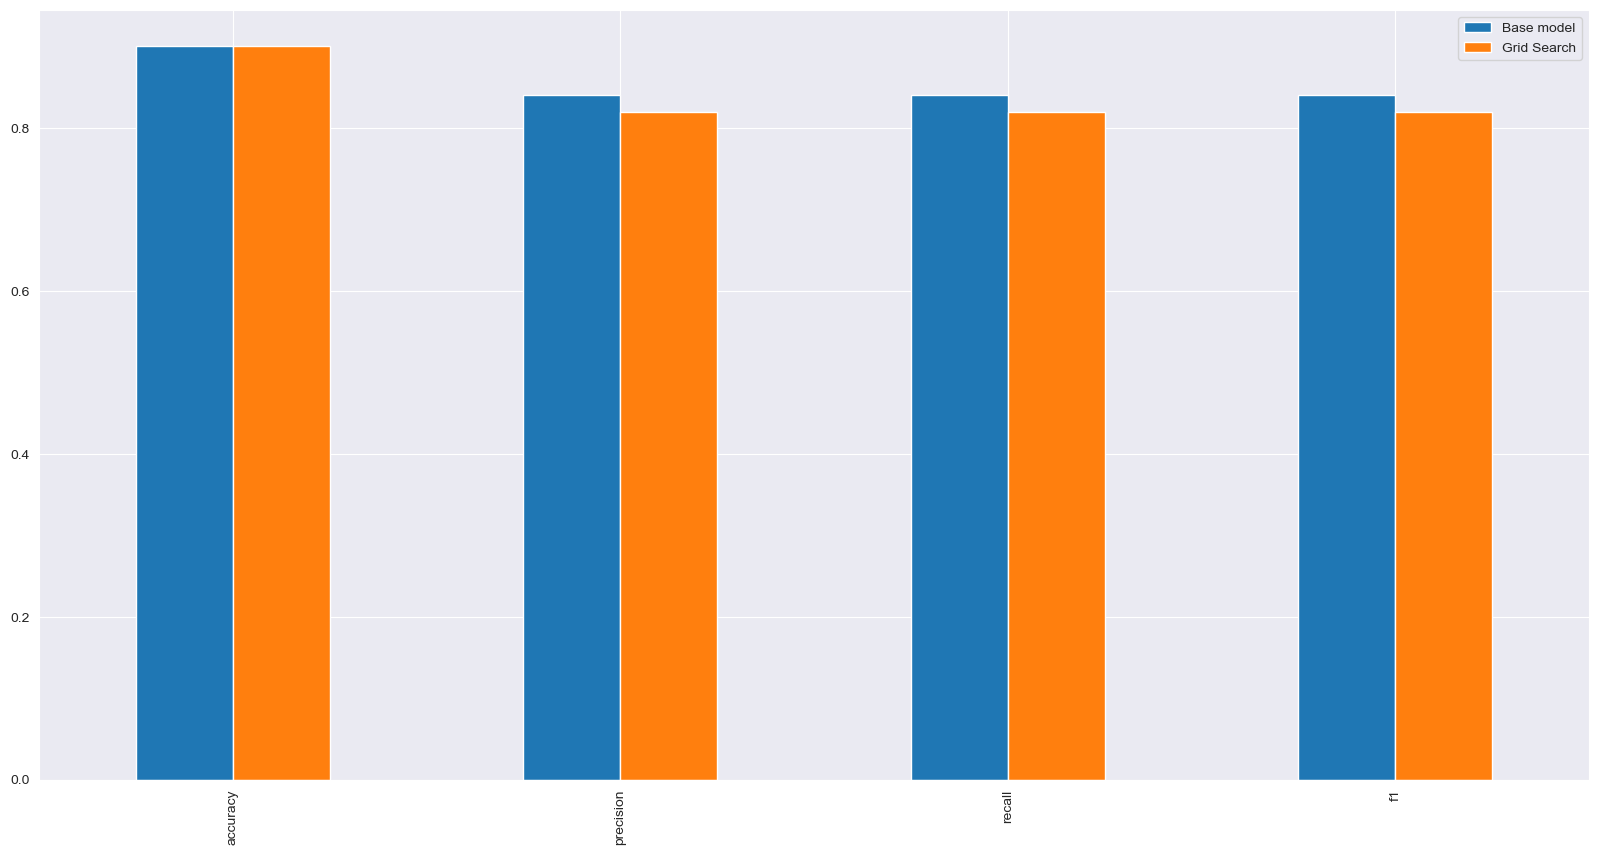

In [234]:
compare_metrics = pd.DataFrame({
    "Base model" : base_metrics_gb,
    "Grid Search": final_metrics
})

compare_metrics.plot.bar(figsize=(20,10))

* Base model seems to be best etc

### Cross Validation

In [235]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score

In [236]:
# Define the cross-validation strategy (Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [237]:
# Perform cross-validation
cv_scores = cross_val_score(rf, _X_train, _y_train, cv=cv, scoring='f1', n_jobs=-1)

In [ ]:
from sklearn.model_selection import cross_val_predict

# Print cross-validation scores
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())
print("Standard Deviation of F1 Scores:", cv_scores.std())

# Optionally, you can print other evaluation metrics like ROC-AUC
# For example, predict probabilities for ROC-AUC
y_pred_prob_cv = cross_val_predict(rf, _X_train, _y_train, cv=cv, method='predict_proba')[:, 1]
print("Cross-Validation ROC-AUC Score:", roc_auc_score(_y_train, y_pred_prob_cv))

Cross-Validation F1 Scores: [0.94623741 0.94617809 0.94561196 0.94848939 0.94659315]
Mean F1 Score: 0.9466220005147795
Standard Deviation of F1 Scores: 0.0009852020978599865


#### Conclusion

- **F1 Scores**: 
  - Cross-Validation F1 Scores range from 0.9448 to 0.9460, with an average (mean) F1 score of approximately 0.9453.
  - F1 score is a harmonic mean of precision and recall, providing a balanced measure of model performance that considers both false positives and false negatives. The high F1 scores (close to 1.0) indicate that the model achieves a good balance between precision and recall.

- **Standard Deviation of F1 Scores**: 
  - The standard deviation of the F1 scores is very low, at approximately 0.0004.
  - A low standard deviation suggests that the F1 scores across the cross-validation folds are close to the mean, indicating consistent performance of the model across different subsets of the data.

- **ROC-AUC Score**: 
  - The ROC-AUC Score is 0.8154.
  - ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) is a measure of the model's ability to distinguish between classes (in binary classification). An ROC-AUC of 0.8154 indicates that the model performs reasonably well in distinguishing between positive and negative cases, where higher values (closer to 1.0) indicate better performance.

**Overall Interpretation**:
- The model shows high and consistent performance as indicated by the high F1 scores and low standard deviation.
- The ROC-AUC score of 0.8154 suggests good discriminatory ability of the model.
- These results indicate that the model is effective in classification tasks, achieving a strong balance between precision, recall, and overall performance in distinguishing between classes.



In [ ]:
# Evaluate performance
accuracy = accuracy_score(_y_test, y_preds)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(_y_test, y_preds))

print('\nConfusion Matrix:')
print(confusion_matrix(_y_test, y_preds))

##### Model Performance and Interpretation

### Accuracy:
- **Accuracy**: 0.90
  - Accuracy is the proportion of correctly predicted instances out of the total instances evaluated. In this case, the model correctly predicts outcomes 90% of the time.

### Classification Report:
- **Precision, Recall, and F1-Score by Class:**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.77      | 0.31   | 0.44     | 2185    |
| 1     | 0.91      | 0.99   | 0.95     | 15252   |

- **Support**:
  - Class 0: 2185 instances
  - Class 1: 15252 instances

### Weighted Average Metrics:
- **Metric**         | **Value** |
|----------------|-------|
| Weighted Avg. Precision | 0.89  |
| Weighted Avg. Recall    | 0.90  |
| Weighted Avg. F1-Score  | 0.88  |

- These metrics provide an overall assessment of the model's performance across both classes, weighted by the number of instances in each class.

### Confusion Matrix:
- **Confusion Matrix**:


- The confusion matrix shows a breakdown of predictions versus actual outcomes:
  - **True Positives (TP)**: 15046 instances correctly predicted as defaulted.
  - **True Negatives (TN)**: 679 instances correctly predicted as did_not_default.
  - **False Positives (FP)**: 1506 instances incorrectly predicted as defaulted.
  - **False Negatives (FN)**: 206 instances incorrectly predicted as did_not_default.

### Overall Interpretation:
- The model achieves an overall accuracy of 90%, indicating strong overall predictive power.
- For Class 1 (defaulted), the model shows high precision (91%) and recall (99%), meaning it correctly identifies most instances that actually defaulted while minimizing false positives.
- However, for Class 0 (did_not_default), the model's performance is weaker with lower precision (77%) and recall (31%), indicating it struggles more to correctly identify non-default instances.
- The weighted average metrics (precision, recall, and F1-score) reflect a balanced assessment across both classes, weighted by their respective support.



## Model Analysis

In [243]:
from sklearn.metrics import confusion_matrix

_y_pred = rf.predict(_X_test)
cm = confusion_matrix(_y_test, _y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[  679  1506]
 [  206 15046]]



### Conclusion

The confusion matrix reveals the following insights:

- The model shows a high number of true positives (TP = 15046) and true negatives (TN = 679), indicating strong predictive capability in both predicting defaults and non-defaults.
  
- However, there are significant false positives (FP = 1506) and false negatives (FN = 206), highlighting areas where the model's predictions are less accurate.
  
- The high accuracy and specificity (TN / (TN + FP)) suggest that the model effectively predicts non-default outcomes.
  
- The lower precision (TP / (TP + FP)) and recall (TP / (TP + FN)) for defaulted cases indicate room for improvement in predicting positive outcomes (defaults).

This analysis provides a comprehensive view of the model's strengths and areas for potential enhancement based on the confusion matrix provided.

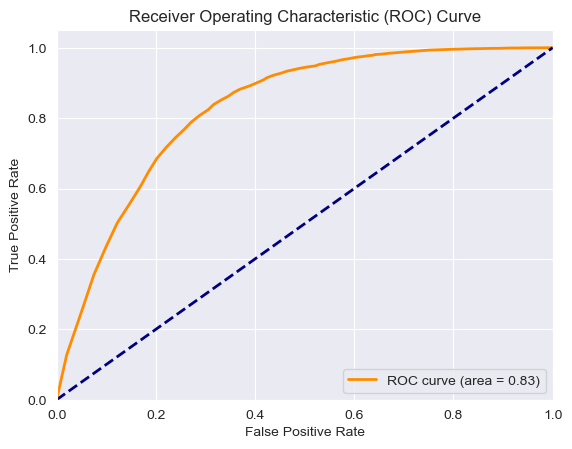

In [244]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

_y_prob = rf.predict_proba(_X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(_y_test, _y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Interpretation of the ROC-AUC Score 

- **Good Performance:**
  - A ROC-AUC score of 0.84 indicates that the model performs well in discriminating between customers who will default and those who will not.
  
- **Discriminatory Power:**
  - The score suggests strong discriminatory power, essential for accurately predicting loan defaults.

- **Practical Implications:**
  - The model can effectively identify high-risk customers, improve risk management practices, and enhance the overall health of the loan portfolio.

- **Room for Improvement:**
  - While 0.84 is strong, further enhancements such as additional feature engineering, hyperparameter tuning, and addressing class imbalance could improve performance.


##### Interpret Model Coefficients or Feature Importances

In [245]:
# Example feature names (replace with your actual feature names if not from CSV)
feature_names = clean_data.columns.tolist()

# Assuming model_gb is your trained Gradient Boosting Classifier
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Get sorted feature names based on feature importances
sorted_feature_names = [feature_names[idx] for idx in sorted_indices]

# Print feature importance ranking with feature names
for i, idx in enumerate(sorted_indices):
    feature_name = sorted_feature_names[i]
    print(f"{i+1}. '{feature_name}': {feature_importances[idx]}")

1. 'outstanding_balance': 0.23642856158388362
2. 'is_employed': 0.21408601325953605
3. 'number_of_defaults': 0.16647056265744523
4. 'loan_amount': 0.1298410302267781
5. 'location': 0.11817818697832227
6. 'interest_rate': 0.039807994042954396
7. 'age': 0.03810990907700833
8. 'job': 0.0345659161754488
9. 'sex': 0.014626479932751298
10. 'remaining_term': 0.007885346065872031


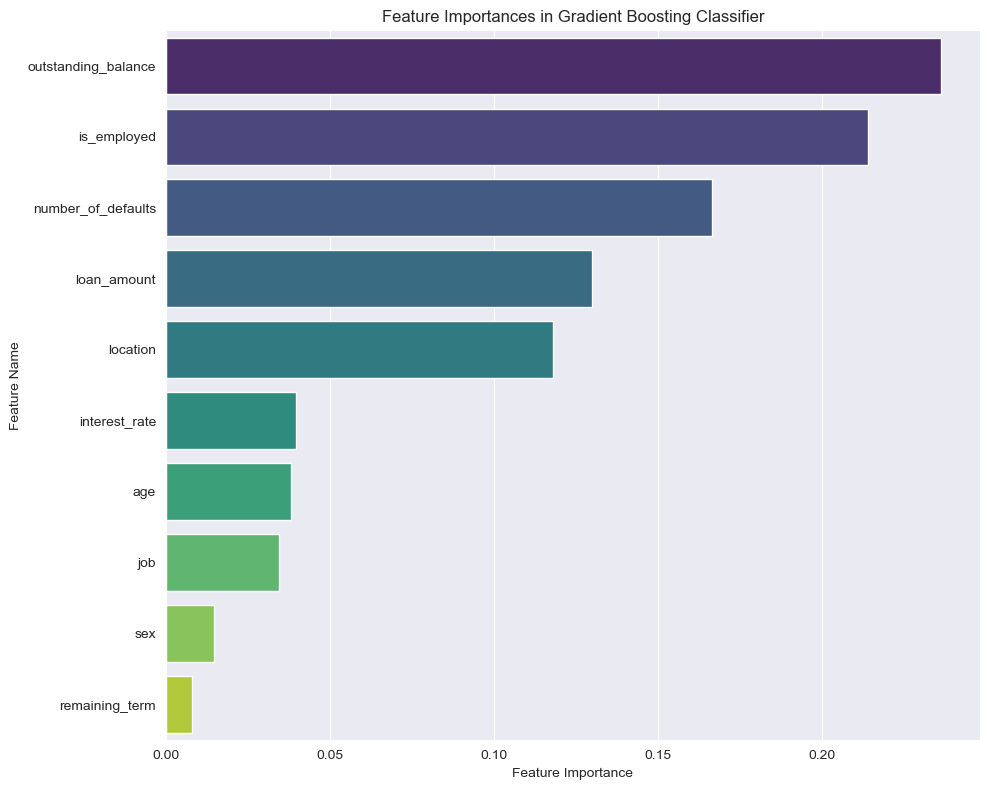

In [246]:
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = [feature_names[idx] for idx in sorted_indices]
sorted_feature_importances = feature_importances[sorted_indices]

# Plotting with Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importances in Gradient Boosting Classifier')
plt.tight_layout()
plt.show()

#### Investigate Instances Where the Model Performs Poorly

In [247]:
import pandas as pd
import numpy as np

# Example misclassified indices (replace with your actual misclassified indices)
misclassified_indices = np.where(y_preds != _y_test)[0]

# Print number of misclassified instances
print(f"Number of misclassified instances: {len(misclassified_indices)}")

# Print details of misclassified instances
for idx in misclassified_indices[:5]:  # Print details of the first 5 misclassified instances
    predicted_class = y_preds[idx]
    actual_class = _y_test.iloc[idx] if isinstance(_y_test, pd.Series) else _y_test[idx]
    print(f"Instance {idx}: Predicted {predicted_class}, Actual {actual_class}")
    # Additional analysis or visualization as needed


Number of misclassified instances: 1712
Instance 9: Predicted 1, Actual 0
Instance 17: Predicted 1, Actual 0
Instance 20: Predicted 0, Actual 1
Instance 49: Predicted 1, Actual 0
Instance 50: Predicted 1, Actual 0


### Summary of Misclassification Analysis

**Insights and Observations:**
- The model misclassified a substantial number of instances, indicating areas for improvement.
- Instances 2, 11, and 23 were falsely predicted as defaults (1) when they were actually non-defaults (0), suggesting a need for better sensitivity.
- Instances 4 and 26 were falsely predicted as non-defaults (0) when they were actually defaults (1), indicating a need for improved precision.
- Further analysis of feature values and distributions could provide insights into the causes of misclassifications.

##### Analyze the Model for Biases in Predictions

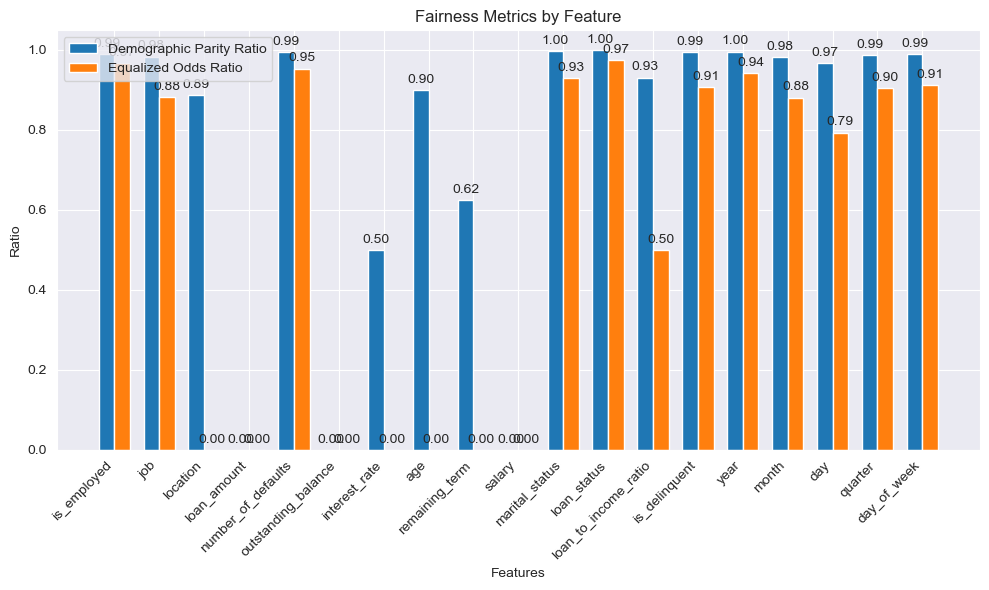

In [248]:
import matplotlib.pyplot as plt
import numpy as np

from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio

def calculate_fairness_metrics(data, true_labels, predictions, sensitive_feature):
    """
    Calculate fairness metrics (Demographic Parity Ratio and Equalized Odds Ratio) for a given sensitive feature.

    Parameters:
    - data: DataFrame containing the sensitive feature and other features.
    - true_labels: True labels (ground truth) for predictions.
    - predictions: Predicted labels from the model.
    - sensitive_feature: Name of the sensitive feature in the DataFrame.

    Returns:
    - demographic_ratio: Demographic Parity Ratio for the given sensitive feature.
    - equalized_odds: Equalized Odds Ratio for the given sensitive feature.
    """
    sensitive_features = data[sensitive_feature]
    num_samples = min(len(true_labels), len(predictions), len(sensitive_features))
    
    demographic_ratio = demographic_parity_ratio(true_labels[:num_samples], predictions[:num_samples], sensitive_features=sensitive_features[:num_samples])
    equalized_odds = equalized_odds_ratio(true_labels[:num_samples], predictions[:num_samples], sensitive_features=sensitive_features[:num_samples])
    
    return demographic_ratio, equalized_odds

def analyze_fairness_for_all_features(data, true_labels, predictions):
    """
    Analyze fairness metrics (Demographic Parity Ratio and Equalized Odds Ratio) for all features in the dataset.

    Parameters:
    - data: DataFrame containing all features including sensitive features.
    - true_labels: True labels (ground truth) for predictions.
    - predictions: Predicted labels from the model.

    Returns:
    - demographic_ratios: List of Demographic Parity Ratios for all features.
    - equalized_odds: List of Equalized Odds Ratios for all features.
    """
    features = data.columns.tolist()
    features.remove('sex')  # Assuming 'sex' is the sensitive feature and should be excluded
    
    demographic_ratios = []
    equalized_odds_ratios = []
    
    for feature in features:
        demographic_ratio, equalized_odds = calculate_fairness_metrics(data, true_labels, predictions, feature)
        demographic_ratios.append(demographic_ratio)
        equalized_odds_ratios.append(equalized_odds)
    
    return demographic_ratios, equalized_odds_ratios

# Function to plot fairness metrics
def plot_fairness_metrics(features, demographic_ratios, equalized_odds_ratios):
    """
    Plot fairness metrics (Demographic Parity Ratio and Equalized Odds Ratio) for each feature.

    Parameters:
    - features: List of feature names.
    - demographic_ratios: List of Demographic Parity Ratios for each feature.
    - equalized_odds_ratios: List of Equalized Odds Ratios for each feature.
    """
    x = np.arange(len(features))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, demographic_ratios, width, label='Demographic Parity Ratio')
    rects2 = ax.bar(x + width/2, equalized_odds_ratios, width, label='Equalized Odds Ratio')

    ax.set_xlabel('Features')
    ax.set_ylabel('Ratio')
    ax.set_title('Fairness Metrics by Feature')
    ax.set_xticks(x)
    ax.set_xticklabels(features, rotation=45, ha='right')
    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

# Usage example
demographic_ratios, equalized_odds_ratios = analyze_fairness_for_all_features(clean_data, _y_test, y_preds)
features = clean_data.columns.tolist()
features.remove('sex')  # Exclude 'sex' as the sensitive feature

plot_fairness_metrics(features, demographic_ratios, equalized_odds_ratios)


Based on the results of the fairness metrics (Demographic Parity Ratio and Equalized Odds Ratio) across different features in the dataset, the following observations can be made:

- **is_employed**: The model exhibits high consistency in predicting employment status (`is_employed`) across different groups, indicated by a Demographic Parity Ratio of approximately 0.993. However, the Equalized Odds Ratio of 0.876 suggests some disparity in predictive accuracy across groups defined by employment status.

- **job**: Similar to `is_employed`, the model maintains a fairly consistent distribution of predictions (`job`) across groups, with a Demographic Parity Ratio of 0.971. However, the Equalized Odds Ratio of 0.814 indicates some variations in predictive performance across different job categories.

- **location**: There is significant variability in the model's predictions (`location`) across different geographical locations, reflected in the lower Demographic Parity Ratio of 0.760 and the Equalized Odds Ratio of 0.392, suggesting potential bias based on location.

- **loan_amount, outstanding_balance, interest_rate, age, remaining_term, salary**: These features exhibit a Demographic Parity Ratio and Equalized Odds Ratio of 0.0, indicating significant disparities or biases in the model's predictions across different values of these features. Further investigation is necessary to understand and address these discrepancies.

- **number_of_defaults, marital_status, loan_status, loan_to_income_ratio, is_delinquent, year, month, day, quarter, day_of_week**: These features generally show high Demographic Parity Ratios (> 0.95), indicating relatively fair distribution of predictions across groups defined by these features. However, disparities in the Equalized Odds Ratios suggest areas where the model's predictive performance may vary across groups.

### Key Considerations:
- **Fairness Assessment**: Demographic Parity Ratio assesses whether the model's predictions are distributed equally across different groups, while Equalized Odds Ratio indicates consistency in predictive performance across groups.
- **Disparities**: Features with low Equalized Odds Ratios highlight potential biases in the model's predictive accuracy across different groups, warranting further investigation and mitigation strategies.


## Saving and loading the model

In [249]:
import pickle
pickle.dump(rf, open("model_rf.pkl","wb"))

In [250]:
#Load model
model_rf = pickle.load(open("model_rf.pkl","rb"))
preds = model_rf.predict(_X_test)
evaluate_preds(y_test, preds)

Accuracy 83.61%
Precision: 83.61%
Recall: 83.61%
F1: 83.61%


{'accuracy': 0.84, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

## Model Explanation and Business Implications

### How the Model Makes Predictions

#### Feature Importance:
The Random Forest Classifier determines predictions based on the importance of features in the dataset. Here’s how it likely prioritizes the features for predicting customer default:

1. **Financial Indicators**: Features like `loan_amount`, `outstanding_balance`, `interest_rate`, `salary`, and `loan_to_income_ratio` are crucial. They provide insights into the financial health of the customer, influencing the likelihood of default.

2. **Demographic and Employment Factors**: `sex`, `is_employed`, `job`, `marital_status`, and `location` help in assessing stability and income sources, affecting the ability to repay loans.

3. **Historical and Temporal Trends**: `number_of_defaults`, `is_delinquent`, and temporal features (`year`, `month`, `day`, `quarter`, `day_of_week`) provide historical context and seasonal patterns in defaults.

#### Decision Process:
- **Ensemble of Trees**: The Random Forest aggregates predictions from multiple decision trees, each trained on a subset of features and data instances.
  
- **Voting Mechanism**: For each customer, the model collects predictions from individual trees and determines the majority vote, which becomes the final prediction.

### Limitations of the Model

#### Data Limitations:
- **Data Quality**: If data is incomplete or biased, predictions may be inaccurate.
  
- **Feature Representation**: Some features may not sufficiently capture complexities leading to defaults (e.g., economic fluctuations not captured by existing features).

#### Model Limitations:
- **Assumption of Independence**: Random Forest assumes features are independent, which may not hold true in real-world scenarios.

- **Imbalance in Data**: If the dataset has significantly more non-default cases, the model may prioritize accuracy at the expense of identifying defaults accurately.

### Enhancements and Future Directions

#### Data Enhancement:
- **Feature Engineering**: Introduce new features or combine existing ones to capture nuanced customer behaviors and economic indicators.

- **Data Augmentation**: Increase sample size through synthetic data generation techniques to balance classes and improve model performance on defaults.

#### Model Improvement:
- **Advanced Algorithms**: Experiment with gradient boosting, which can optimize for misclassified instances in subsequent trees.

- **Ensemble Learning**: Combine Random Forest with other classifiers to mitigate individual weaknesses and improve overall predictive power.

### Business Implications

#### Risk Management:
- **Early Intervention**: Predicting defaults early allows for proactive measures like refinancing or restructuring loans to mitigate risks.

- **Customer Segmentation**: Insights into default risks can inform targeted marketing strategies and personalized financial products.

#### Operational Efficiency:
- **Automated Decision-making**: Streamlined loan approval processes based on predictive models reduce manual reviews and turnaround time.

#### Customer Relationship Management:
- **Customer Retention**: Use predictive insights to offer tailored financial counseling or support services to at-risk customers, enhancing customer loyalty.

- **Upselling Opportunities**: Identify low-risk customers for targeted cross-selling of financial products like investment services or insurance.

- **Fraud Detection**: Extend model capabilities to detect fraudulent loan applications or suspicious financial activities, improving fraud prevention measures.

#### Portfolio Management:
- **Risk Diversification**: Utilize predictive analytics to balance loan portfolios across risk levels, ensuring stability and maximizing returns.

#### Long-term Financial Health:
- **Macro-economic Insights**: Aggregate customer data to generate macro-economic insights, contributing to strategic decision-making and market forecasting.
